In [1]:
from src.functions import *

In [2]:
df_season = pd.read_csv('data/2nba_player_stats_by_season.csv')

/home/luke/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (102) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Exploratory Graphs

In [104]:
players_grouped = df_season.groupby('name')['avg_salary'].agg(np.sum)
players_grouped.sort_values(ascending=True)[:50]

name
Kirk Penney                4475.000000
Aaron Jackson              4608.000000
Yante Maten                7105.500000
Ira Bowman                 8105.333333
Paul Shirley               9944.000000
JamesOn Curry             13458.500000
Jamel Thomas              15981.500000
Jason Miskiri             15982.000000
Mike Harris               16244.500000
Torraye Braggs            17899.000000
Renaldo Major             20133.000000
Jameel Warney             23040.000000
Jordan Sibert             23685.500000
Melvin Sanders            24315.000000
Alex Scales               24315.000000
Scotty Hopson             24719.666667
Will Cherry               25000.000000
Marques Bolden            25376.000000
Paul Watson               25376.000000
Kobi Simmons              25412.000000
Jemerrio Jones            26054.000000
Trey Gilder               26917.000000
Jamaal Franklin           27216.000000
Luke Schenscher           27500.000000
Omari Johnson             27648.000000
Jerel McNeal        

In [172]:
avg_sal = players_grouped.sort_values(ascending=True)
avg_sal = avg_sal.apply(mil_format)
avg_sal[:50]

name
Kirk Penney               $0.0M
Aaron Jackson             $0.0M
Yante Maten               $0.0M
Ira Bowman                $0.0M
Paul Shirley              $0.0M
JamesOn Curry             $0.0M
Jamel Thomas              $0.0M
Jason Miskiri             $0.0M
Mike Harris               $0.0M
Torraye Braggs            $0.0M
Renaldo Major             $0.0M
Jameel Warney             $0.0M
Jordan Sibert             $0.0M
Melvin Sanders            $0.0M
Alex Scales               $0.0M
Scotty Hopson             $0.0M
Will Cherry               $0.0M
Marques Bolden            $0.0M
Paul Watson               $0.0M
Kobi Simmons              $0.0M
Jemerrio Jones            $0.0M
Trey Gilder               $0.0M
Jamaal Franklin           $0.0M
Luke Schenscher           $0.0M
Omari Johnson             $0.0M
Jerel McNeal              $0.0M
Sim Bhullar               $0.0M
David Wear                $0.0M
Mustafa Shakur            $0.0M
Wayne Turner              $0.0M
Kiwane Lemorris Garris    $0.0M
Guy

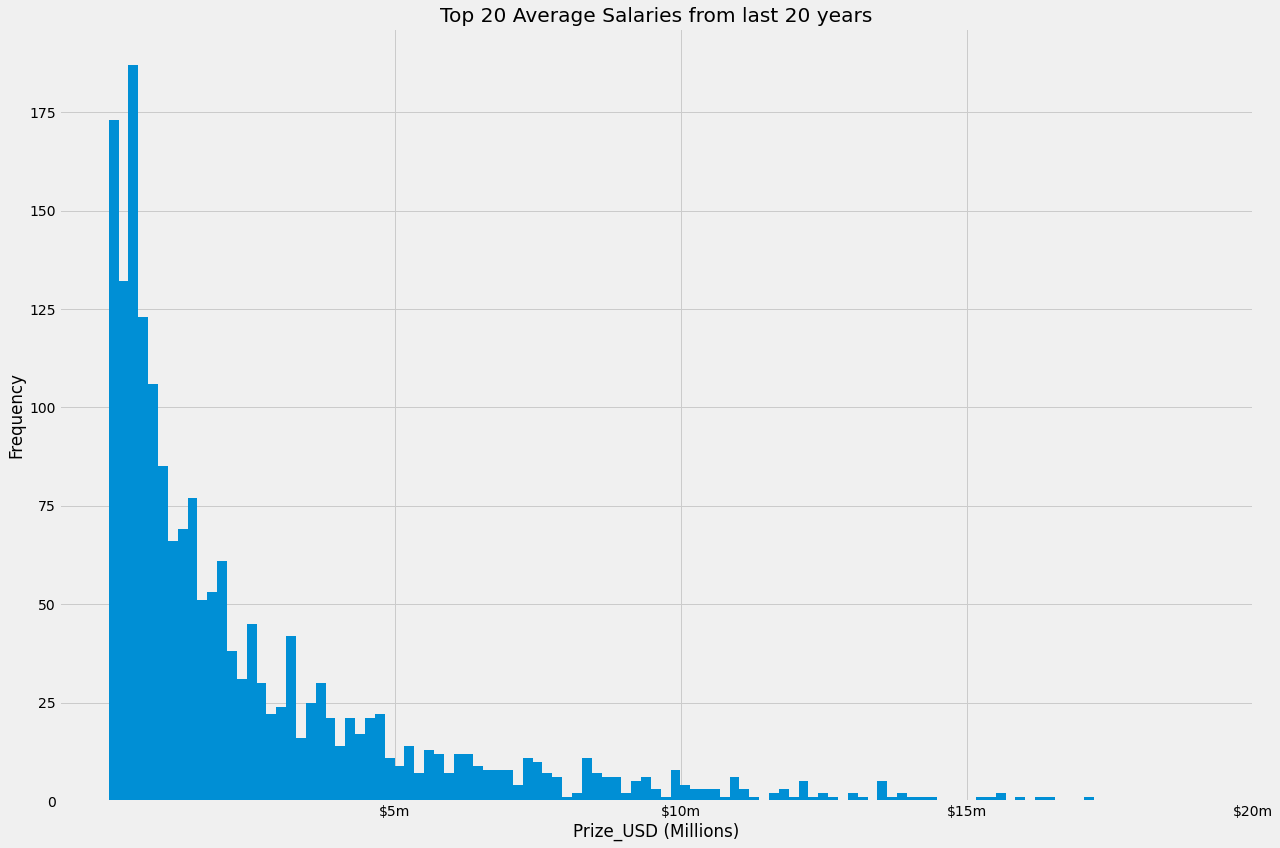

In [164]:
ax = avg_sal.plot.hist(bins=100, figsize=(18,12))

ax.set_title('Top 20 Average Salaries from last 20 years')
ax.set_xlabel('Prize_USD (Millions)')
ax.set_xticks(ticks=[5000000, 10000000, 15000000, 20000000])
ax.set_xticklabels(['$5m','$10m','$15m','$20m'])

plt.tight_layout()
plt.savefig('images/salary_hist.png')

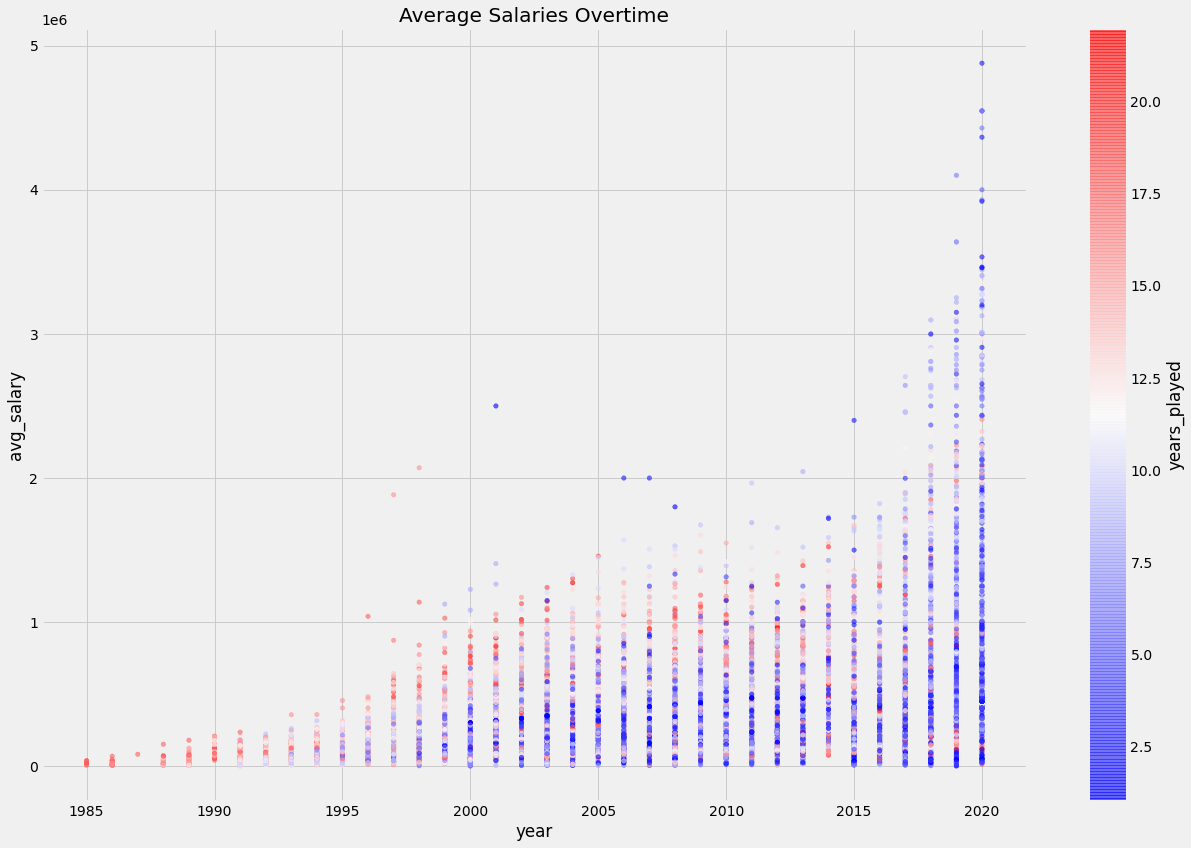

In [113]:
df_season.plot(kind="scatter", x="year", y="avg_salary", alpha=0.6, figsize=(18,12),
             c="years_played", cmap=plt.get_cmap("bwr"), colorbar=True,
             title='Average Salaries Overtime')

plt.tight_layout()
plt.savefig('images/avg_salaries_overtime.png')

# Looking for correlations

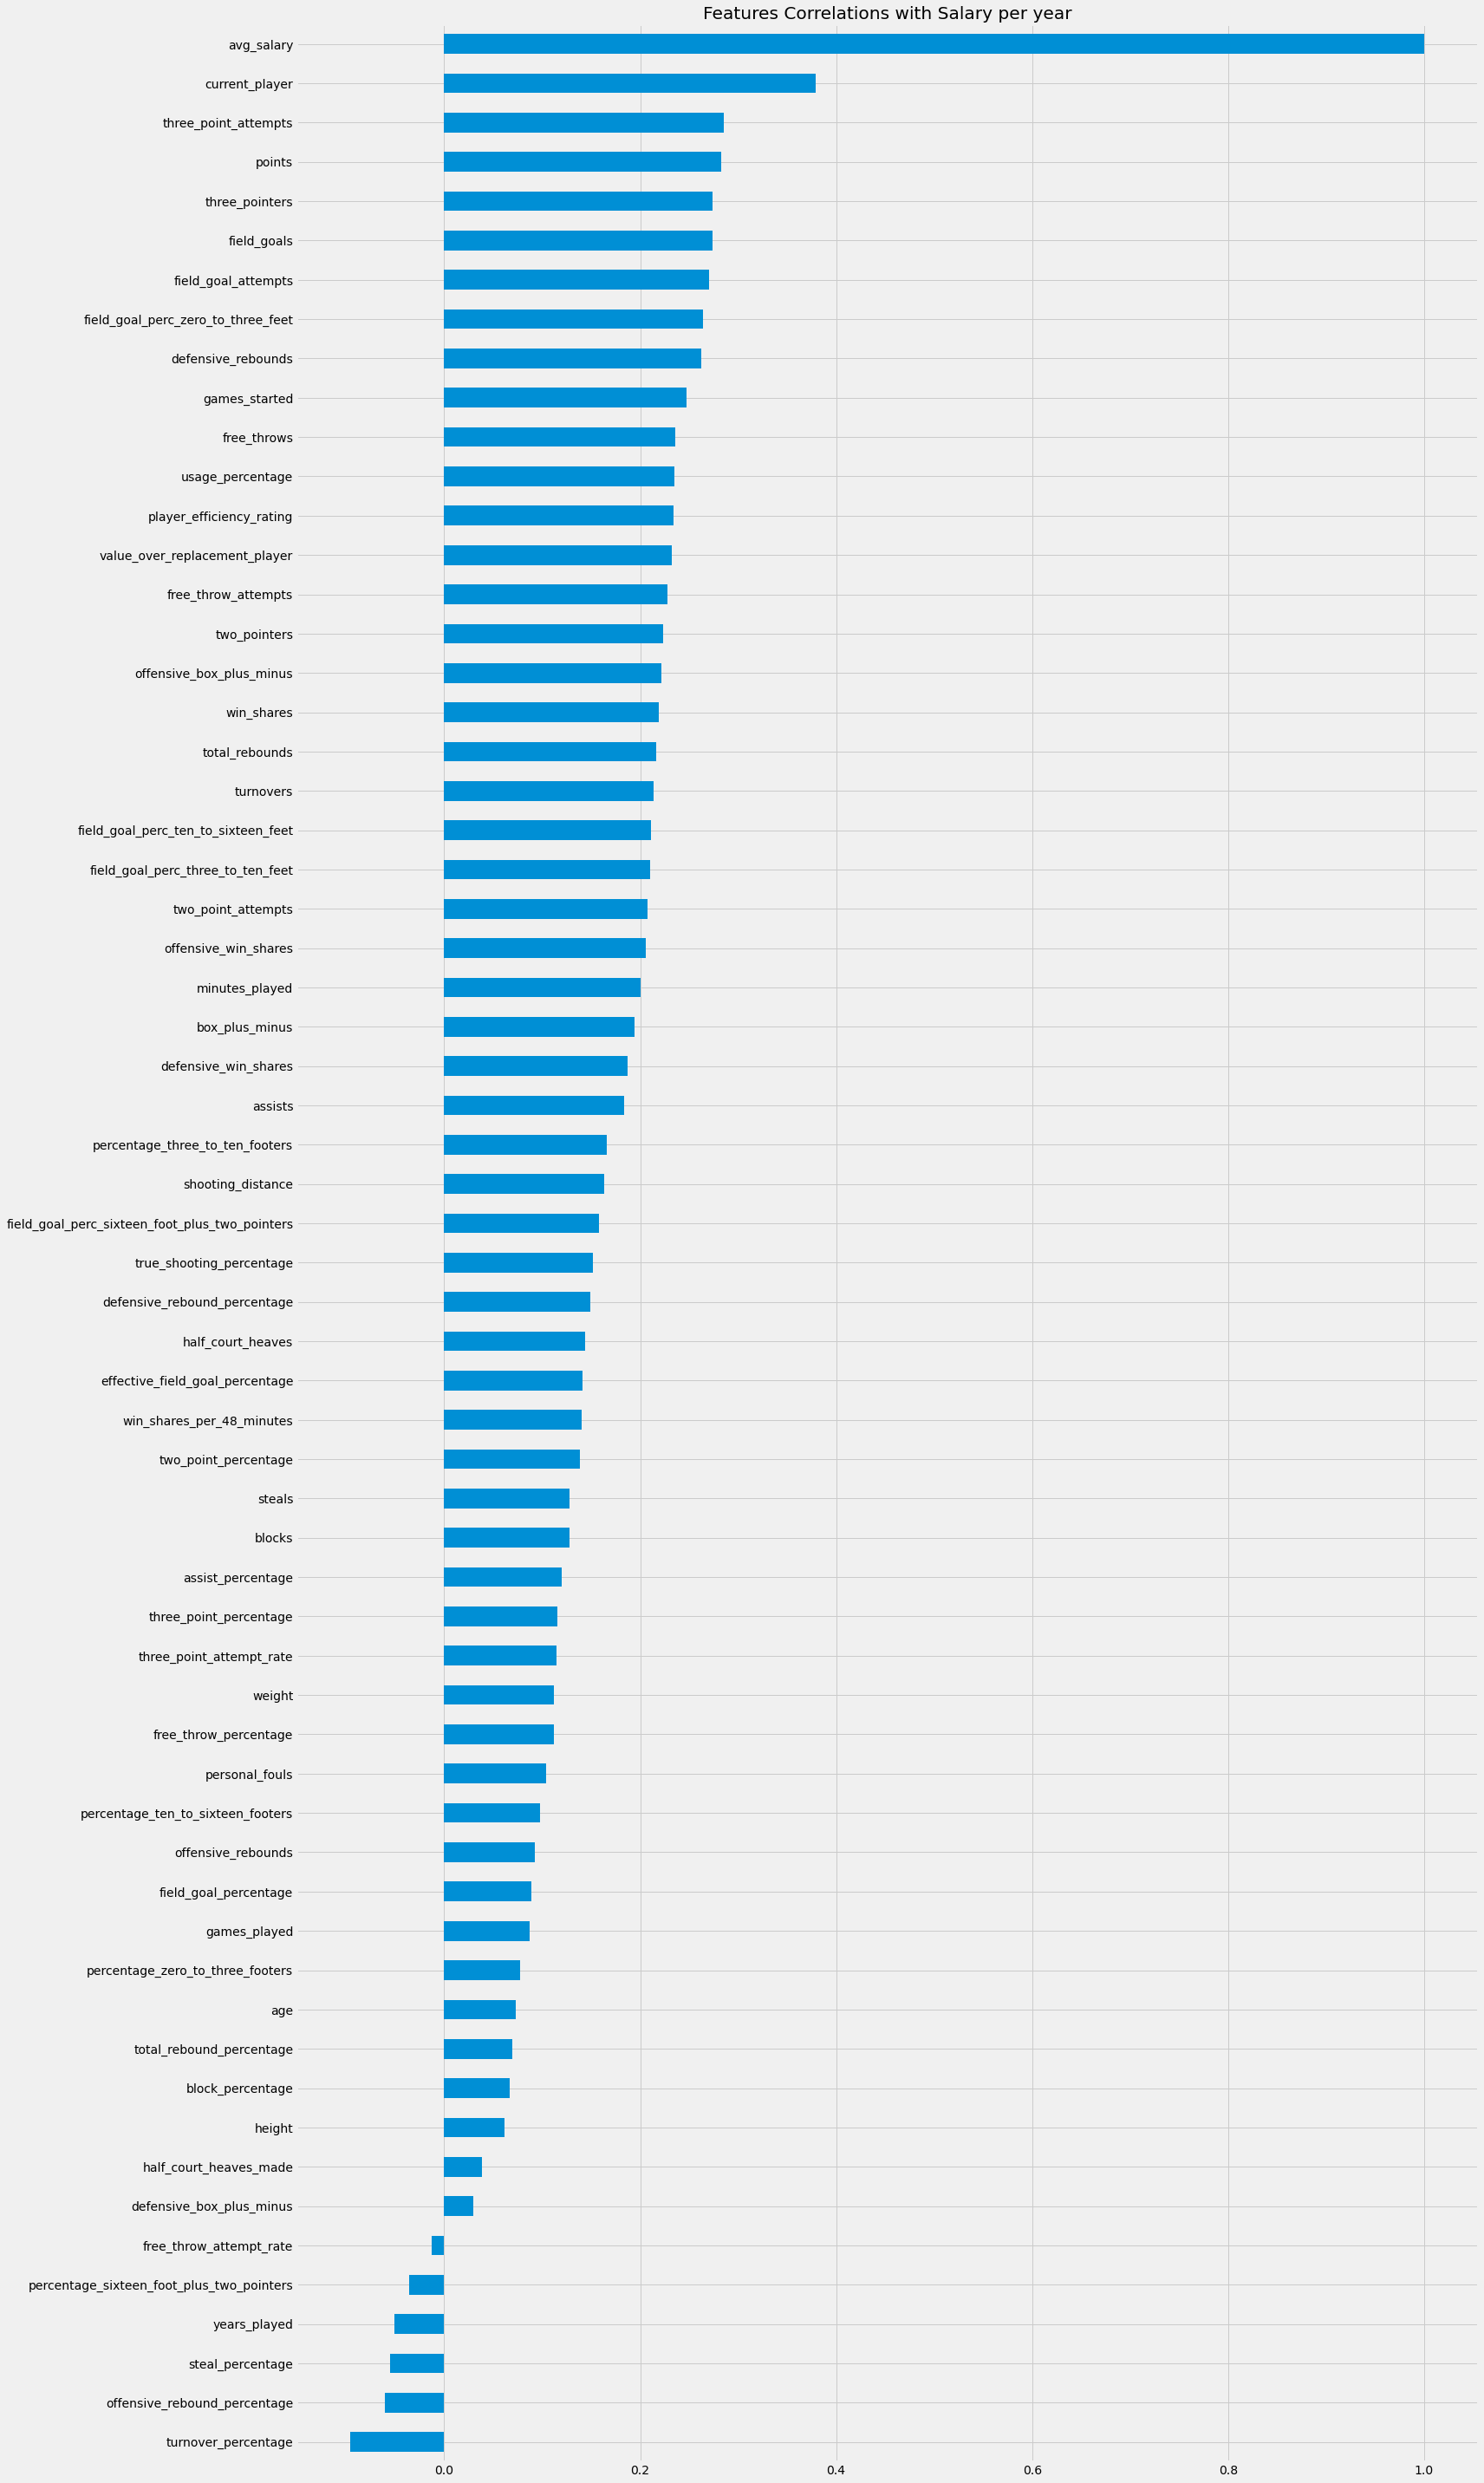

In [167]:
corr_matrix = df_pure_stats.corr()
corr_matrix['avg_salary'].sort_values(ascending=True).plot(title='Features Correlations with Salary per year', kind='barh', figsize=(24,40))
plt.tight_layout()
plt.savefig('images/feature_correlation.png')

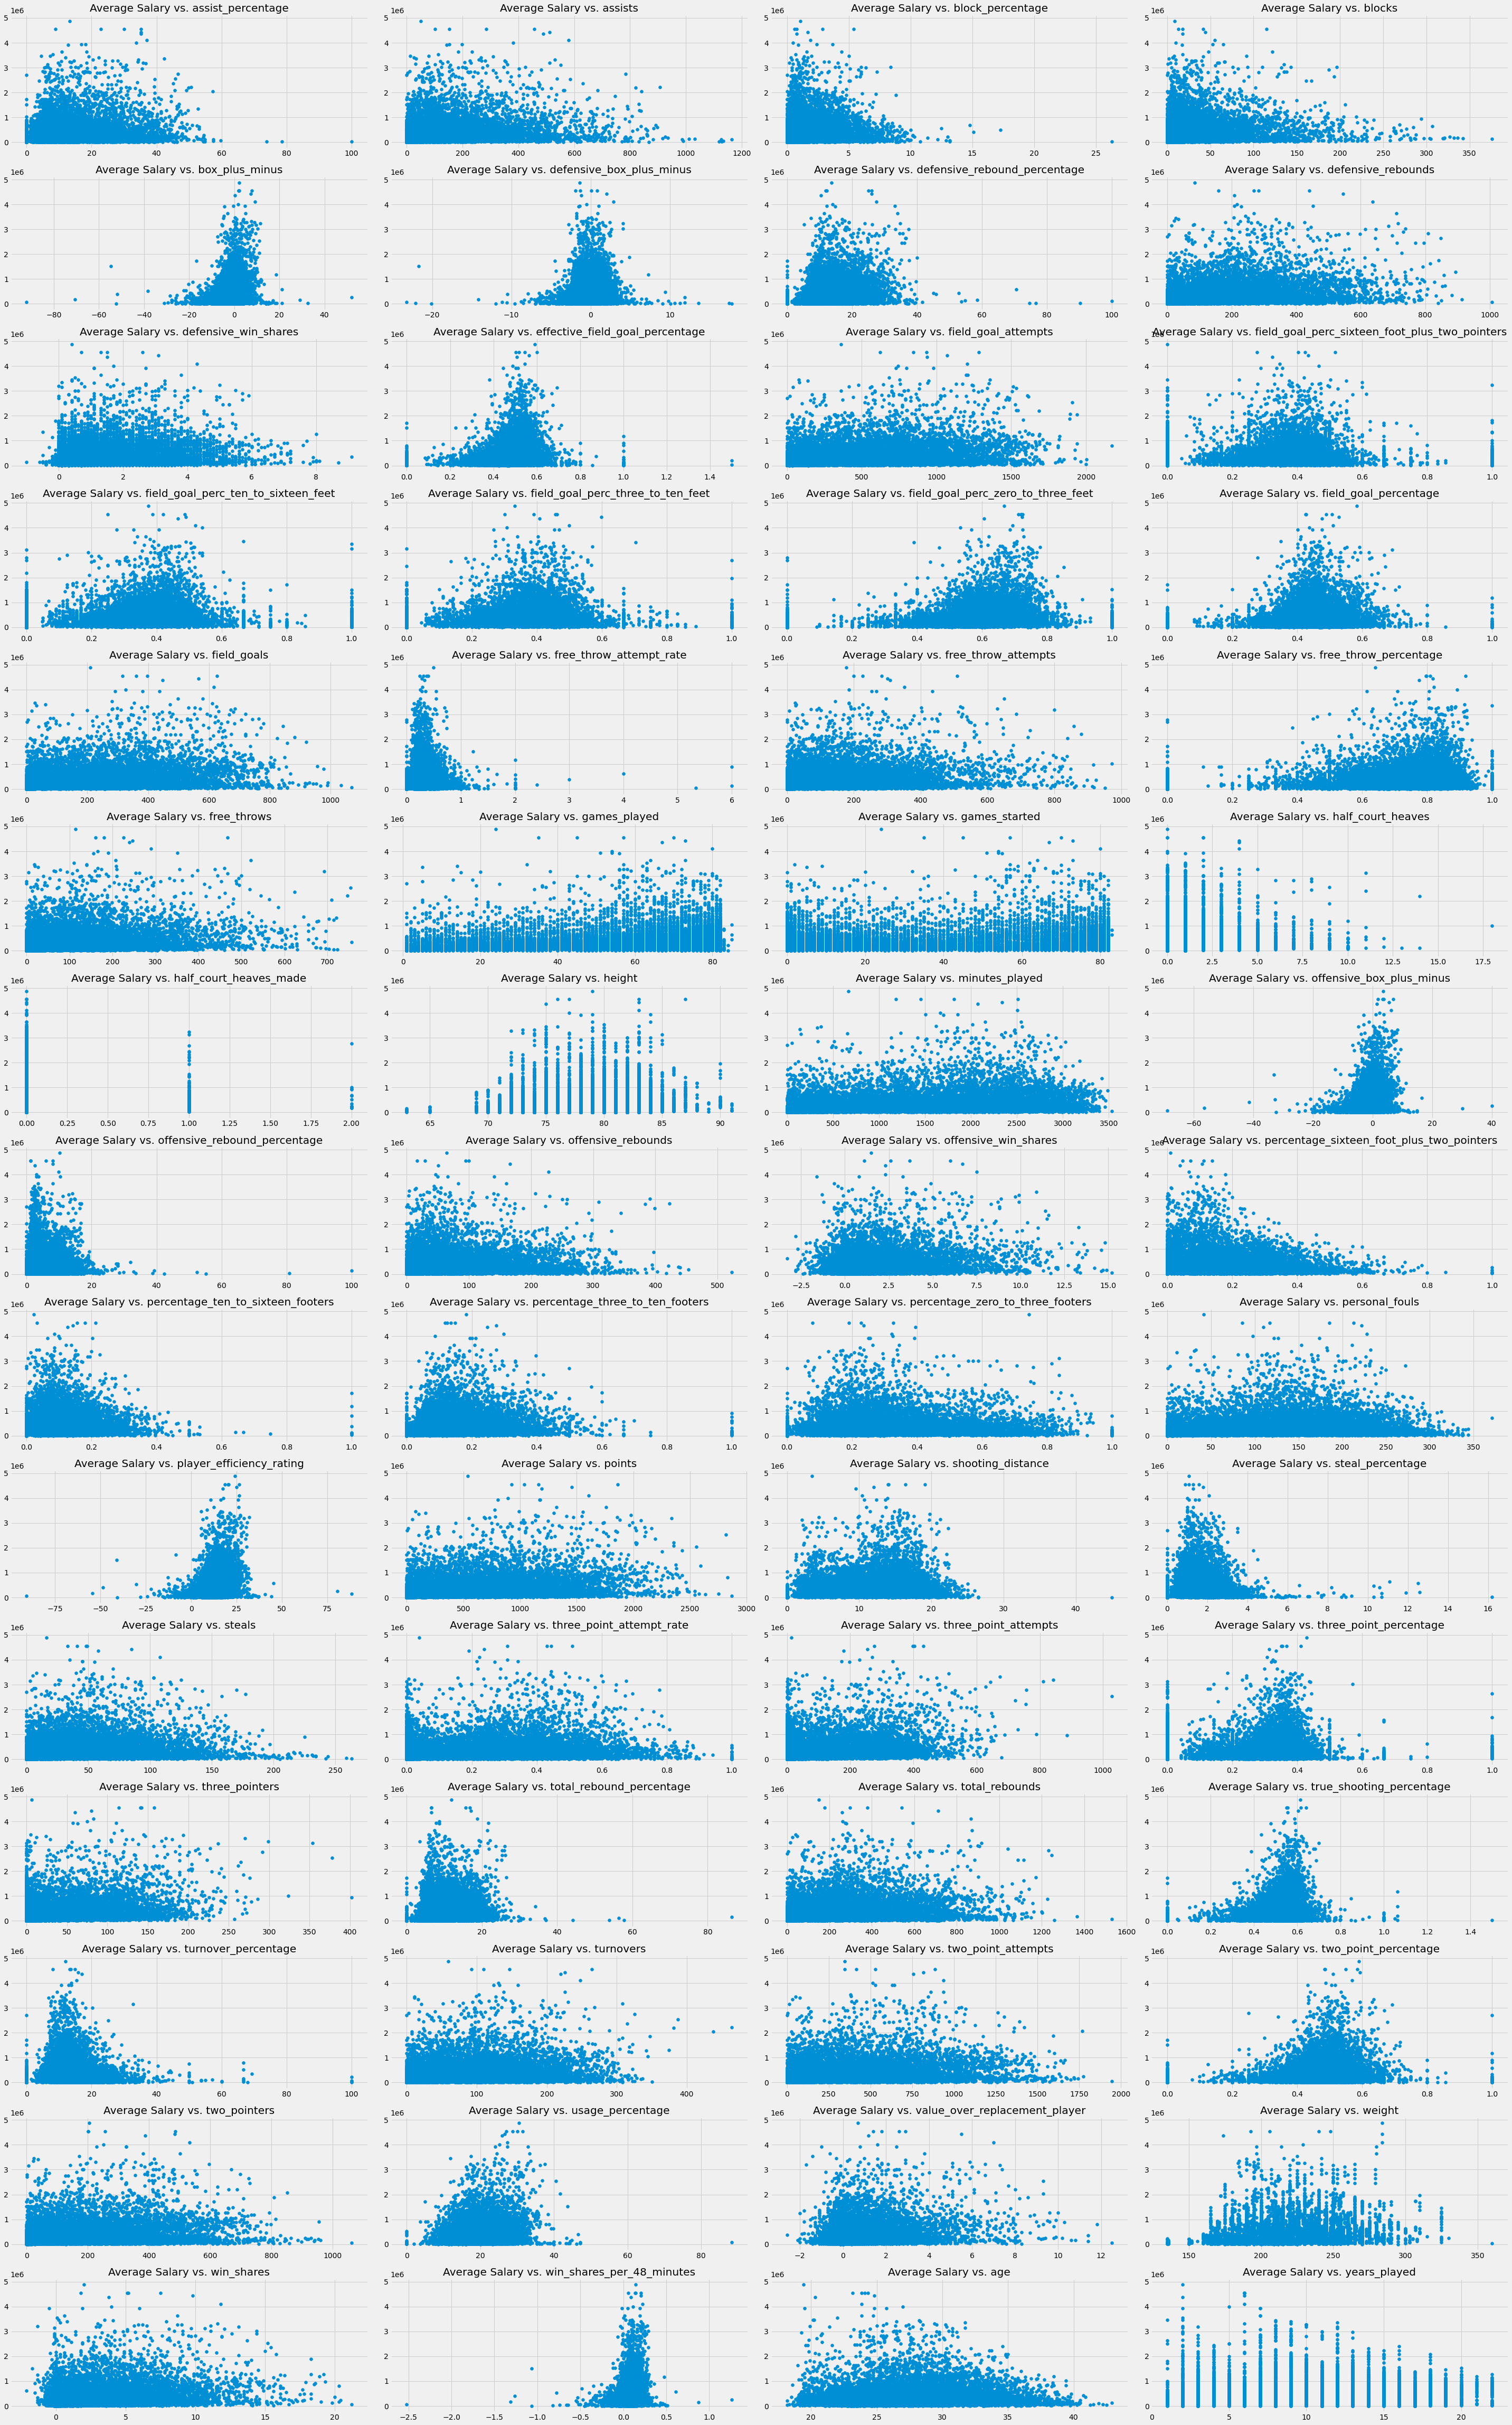

In [116]:
fig, axs = plt.subplots(15, 4, figsize = (40, 64))

for ax, col in zip(axs.flatten(), df_pure_stats.drop(['avg_salary', 'current_player'], axis=1).columns):
    ax.scatter(df_pure_stats[col], df_pure_stats['avg_salary'])
    ax.set_title(f'Average Salary vs. {col}')
    
fig.tight_layout()
plt.savefig('images/scattermatrix.png')

# Train_test_splitting

In [117]:
y = df_pure_stats['avg_salary']
X = df_pure_stats.drop('avg_salary', axis=1)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [119]:
salary_median = np.median(y_train)
salary_median

250000.0

In [120]:
salary_mean = np.mean(y_train)
salary_mean

397970.16219239915

In [121]:
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:             avg_salary   R-squared (uncentered):                   0.664
Model:                            OLS   Adj. R-squared (uncentered):              0.662
Method:                 Least Squares   F-statistic:                              317.5
Date:                Fri, 02 Apr 2021   Prob (F-statistic):                        0.00
Time:                        13:10:33   Log-Likelihood:                     -1.3055e+05
No. Observations:                9196   AIC:                                  2.612e+05
Df Residuals:                    9139   BIC:                                  2.616e+05
Df Model:                          57                                                  
Covariance Type:            nonrobust                                                  
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----

# Linear Regression

## Training

In [122]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [123]:
train_predictions = lin_model.predict(X_train)

In [124]:
print("Mean absolute error =", round(mean_absolute_error(y_train, train_predictions), 2)) 
print("Mean squared error =", round(mean_squared_error(y_train, train_predictions), 2)) 
print("Median absolute error =", round(median_absolute_error(y_train, train_predictions), 2)) 
print("Explain variance score =", round(explained_variance_score(y_train, train_predictions), 2)) 
print("R2 score =", round(r2_score(y_train, train_predictions), 2))

Mean absolute error = 235690.62
Mean squared error = 124122685448.13
Median absolute error = 171679.37
Explain variance score = 0.42
R2 score = 0.42


In [125]:
residuals = train_predictions - y_train

In [126]:
np.median(residuals)

42176.68357254236

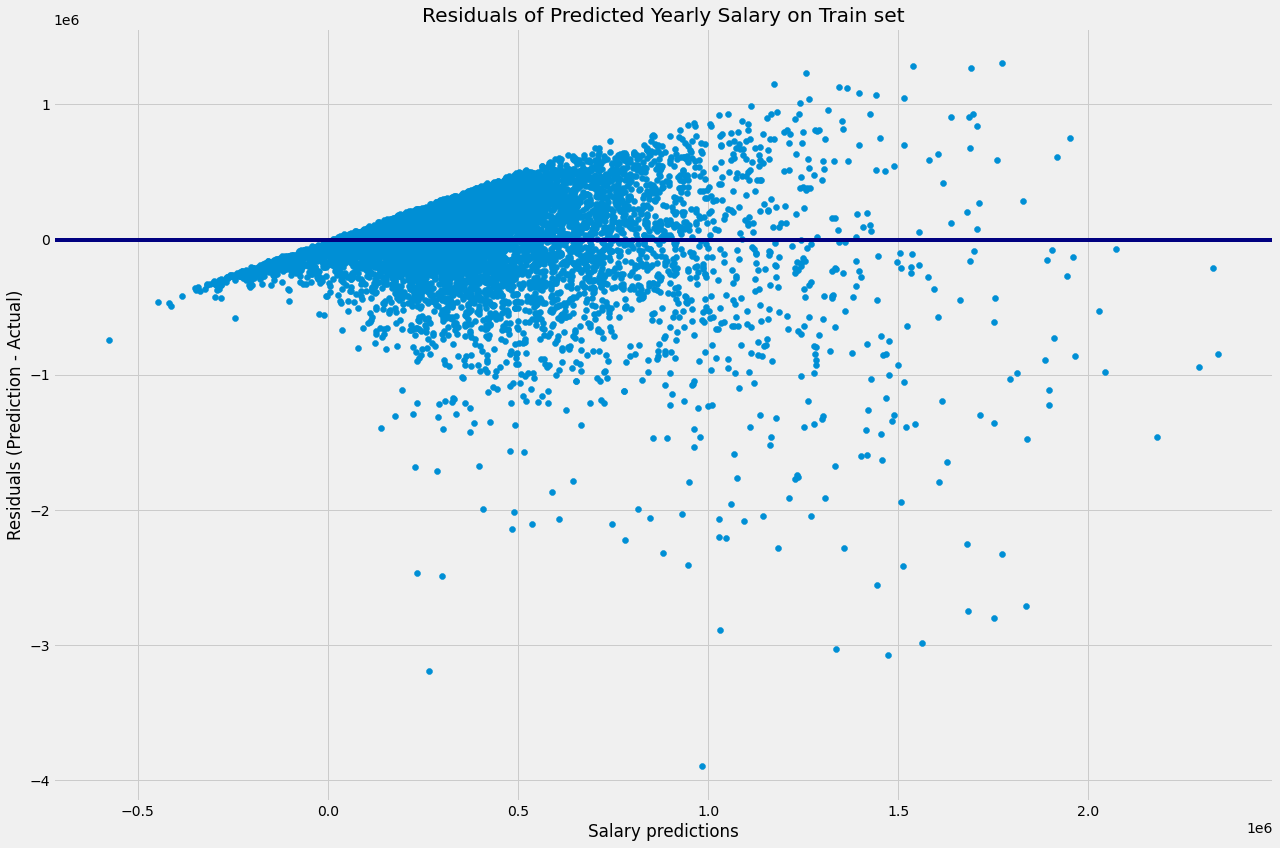

In [127]:
fig, ax = plt.subplots(figsize = (18,12))

ax.scatter(train_predictions, residuals)
ax.axhline(0, color = 'navy')

ax.set_ylabel('Residuals (Prediction - Actual)')
ax.set_xlabel('Salary predictions')
ax.set_title('Residuals of Predicted Yearly Salary on Train set')

plt.tight_layout()
plt.savefig('images/residuals_train.png');

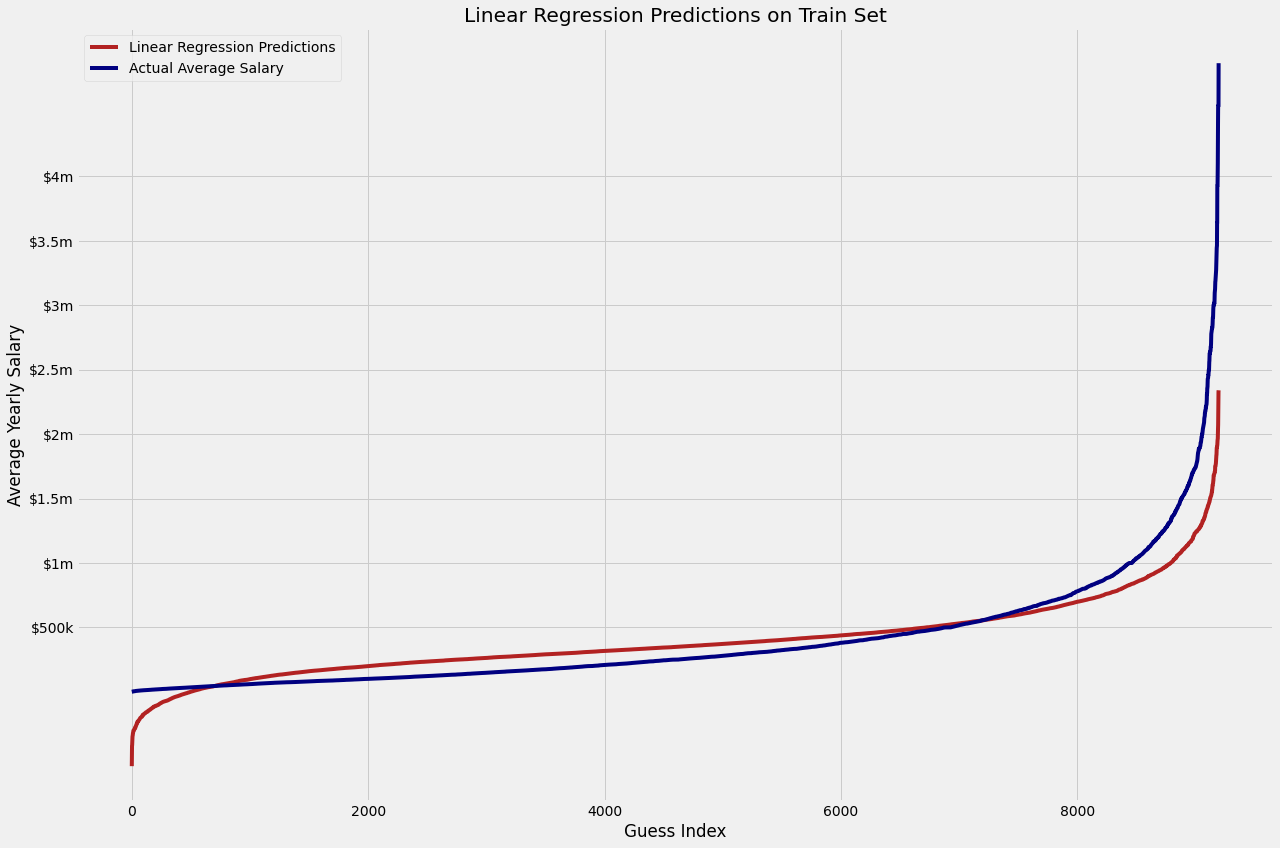

In [128]:
fig, ax = plt.subplots(figsize=(18,12))

ax.plot(np.sort(train_predictions), label='Linear Regression Predictions', c='firebrick')
ax.plot(np.sort(y_train), label='Actual Average Salary', c='navy')
#ax.axhline(lin_rmse, linestyle='--', label='RMSE',c='tomato')
#ax.axhline(salary_median, linestyle='--', label='Actual Median', c='deepskyblue')
ax.set_yticks(ticks=[500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000])
ax.set_yticklabels(['$500k','$1m','$1.5m','$2m','$2.5m','$3m','$3.5m', '$4m'])
ax.set_ylabel('Average Yearly Salary')
ax.set_xlabel('Guess Index')
ax.set_title('Linear Regression Predictions on Train Set')

plt.tight_layout()
plt.legend()
plt.savefig('images/linear_regression.png');

## Predicting on Test Set

In [129]:
test_predictions = lin_model.predict(X_test)

In [130]:
print("Mean absolute error =", round(mean_absolute_error(y_test, test_predictions), 2)) 
print("Mean squared error =", round(mean_squared_error(y_test, test_predictions), 2)) 
print("Median absolute error =", round(median_absolute_error(y_test, test_predictions), 2)) 
print("Explain variance score =", round(explained_variance_score(y_test, test_predictions), 2)) 
print("R2 score =", round(r2_score(y_test, test_predictions), 2))

Mean absolute error = 246942.21
Mean squared error = 134161689478.96
Median absolute error = 176686.07
Explain variance score = 0.4
R2 score = 0.4


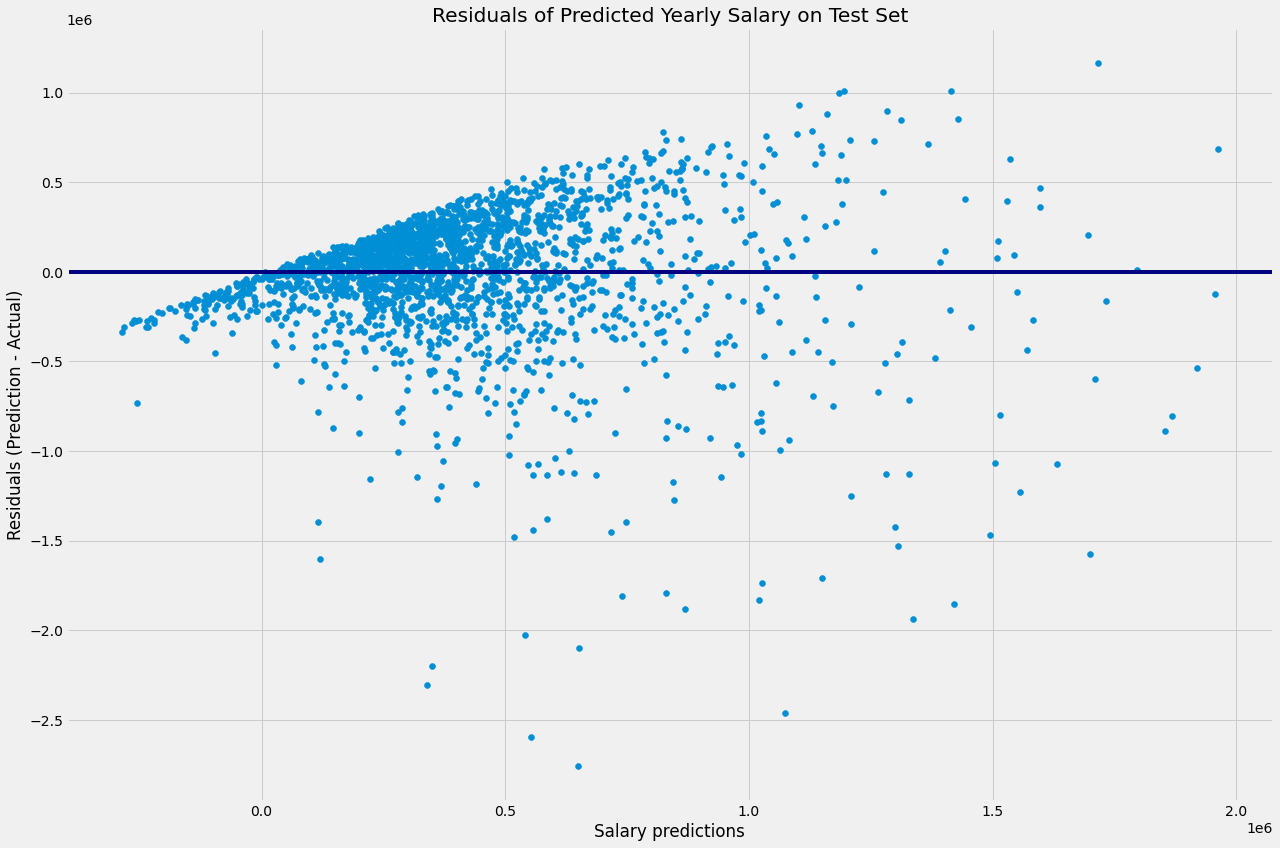

In [133]:
fig, ax = plt.subplots(figsize = (18,12))

ax.scatter(test_predictions, residuals_test)
ax.axhline(0, color = 'navy')

ax.set_ylabel('Residuals (Prediction - Actual)')
ax.set_xlabel('Salary predictions')
ax.set_title('Residuals of Predicted Yearly Salary on Test Set')

plt.tight_layout()
plt.savefig('images/residuals_test.png');

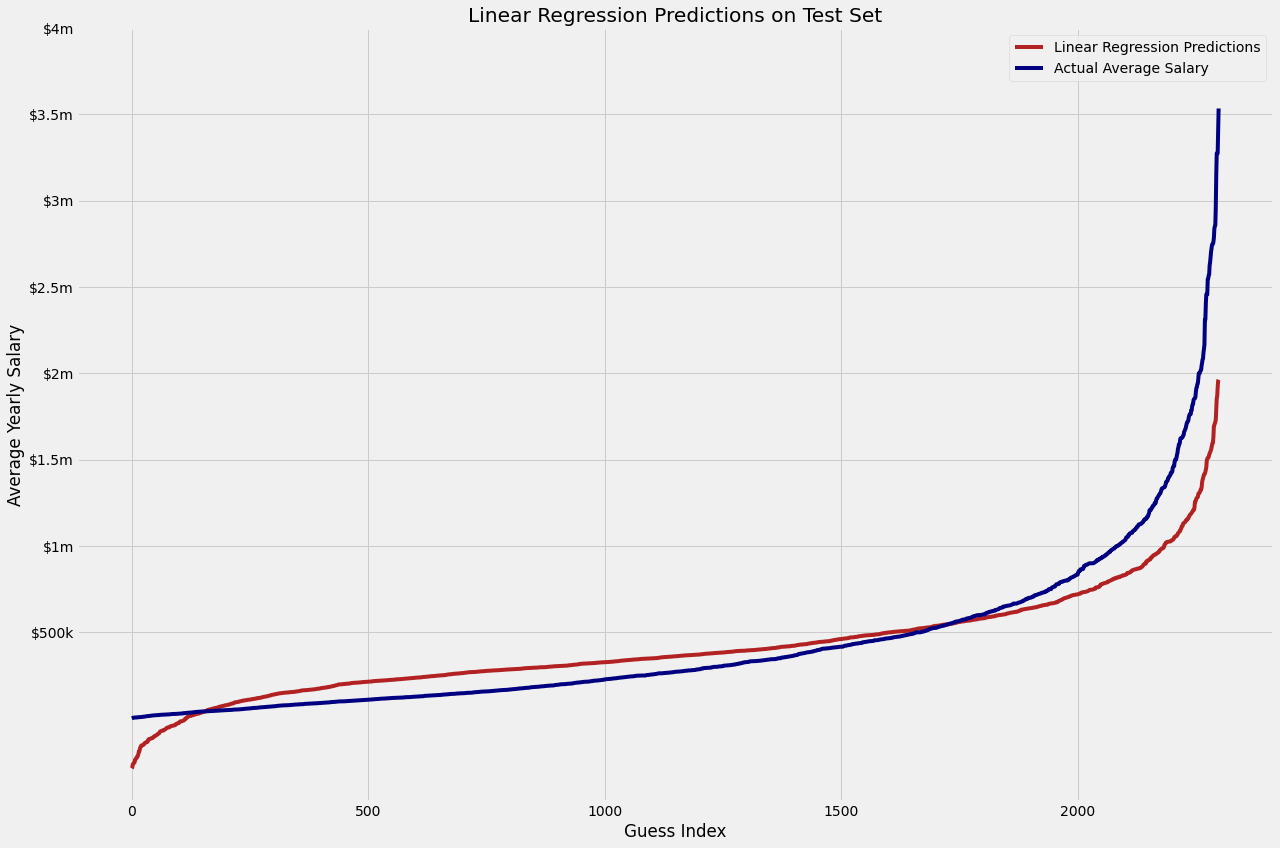

In [134]:
fig, ax = plt.subplots(figsize=(18,12))

ax.plot(np.sort(test_predictions), label='Linear Regression Predictions', c='firebrick')
ax.plot(np.sort(y_test), label='Actual Average Salary', c='navy')
#ax.axhline(lin_rmse, linestyle='--', label='RMSE',c='tomato')
#ax.axhline(salary_median, linestyle='--', label='Actual Median', c='deepskyblue')
ax.set_yticks(ticks=[500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000])
ax.set_yticklabels(['$500k','$1m','$1.5m','$2m','$2.5m','$3m','$3.5m', '$4m'])
ax.set_ylabel('Average Yearly Salary')
ax.set_xlabel('Guess Index')
ax.set_title('Linear Regression Predictions on Test Set')

plt.tight_layout()
plt.legend()
plt.savefig('images/linear_regression_test.png');

# Neural Networking

In [135]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

### Create model

In [138]:
def build_and_compile_model(loss):
  model = keras.Sequential([
      layers.Dense(first_hidden, activation='relu', input_shape=[X_train.shape[1]]),
      layers.Dense(first_hidden//4, activation='relu'),
      layers.Dense(first_hidden//16, activation='relu'),
      layers.Dense(first_hidden//32, activation='relu'),
      layers.Dense(first_hidden//64, activation='relu'),
      layers.Dense(1, activation='linear')
  ])

  model.compile(loss=loss,optimizer=tf.keras.optimizers.Adam(0.0001),
                metrics=['mae'])
  return model

In [139]:
epochs = 500

In [140]:
loss_functions = ['mae', 'mse', 'mape', 'msle', 'cosine_similarity', 'huber', 'logcosh']
history_lst = []

In [143]:
for loss in loss_functions:
    model = build_and_compile_model(loss)
    
    callbacks = [ModelCheckpoint(filepath=f'models/{loss}.h5', save_weights_only=False, save_best_only=True, monitor='val_loss', verbose=0)]
    history = model.fit(
        X_train, y_train, callbacks=callbacks,
        verbose=1, epochs=epochs, 
        validation_data=(X_test,y_test))
    
    history_lst.append(history)

Epoch 1/500
203/203 [==============================] - 3s 11ms/step - loss: 393242.7855 - mae: 393242.7855 - val_loss: 279963.5312 - val_mae: 279963.5312
Epoch 2/500
203/203 [==============================] - 2s 10ms/step - loss: 290020.5521 - mae: 290020.5521 - val_loss: 275896.3750 - val_mae: 275896.3750
Epoch 3/500
203/203 [==============================] - 2s 10ms/step - loss: 277589.0567 - mae: 277589.0567 - val_loss: 271543.4375 - val_mae: 271543.4375
Epoch 4/500
203/203 [==============================] - 2s 10ms/step - loss: 277879.8735 - mae: 277879.8735 - val_loss: 266550.7500 - val_mae: 266550.7500
Epoch 5/500
203/203 [==============================] - 2s 10ms/step - loss: 274505.1169 - mae: 274505.1169 - val_loss: 263233.9375 - val_mae: 263233.9375
Epoch 6/500
203/203 [==============================] - 2s 10ms/step - loss: 272063.7852 - mae: 272063.7852 - val_loss: 261547.7188 - val_mae: 261547.7188
Epoch 7/500
203/203 [==============================] - 2s 10ms/step - loss: 

Epoch 54/500
203/203 [==============================] - 2s 10ms/step - loss: 227074.7237 - mae: 227074.7237 - val_loss: 227897.9219 - val_mae: 227897.9219
Epoch 55/500
203/203 [==============================] - 2s 11ms/step - loss: 222319.9877 - mae: 222319.9877 - val_loss: 229200.1406 - val_mae: 229200.1406
Epoch 56/500
203/203 [==============================] - 2s 10ms/step - loss: 227822.3056 - mae: 227822.3056 - val_loss: 227429.7500 - val_mae: 227429.7500
Epoch 57/500
203/203 [==============================] - 2s 10ms/step - loss: 224750.8681 - mae: 224750.8681 - val_loss: 227219.9688 - val_mae: 227219.9688
Epoch 58/500
203/203 [==============================] - 2s 10ms/step - loss: 225682.2510 - mae: 225682.2510 - val_loss: 226775.3594 - val_mae: 226775.3594
Epoch 59/500
203/203 [==============================] - 2s 10ms/step - loss: 229170.3624 - mae: 229170.3624 - val_loss: 226081.2031 - val_mae: 226081.2031
Epoch 60/500
203/203 [==============================] - 2s 10ms/step -

Epoch 107/500
203/203 [==============================] - 2s 10ms/step - loss: 217778.7927 - mae: 217778.7927 - val_loss: 220681.8281 - val_mae: 220681.8281
Epoch 108/500
203/203 [==============================] - 2s 10ms/step - loss: 212703.5646 - mae: 212703.5646 - val_loss: 218001.2812 - val_mae: 218001.2812
Epoch 109/500
203/203 [==============================] - 2s 10ms/step - loss: 219307.3919 - mae: 219307.3919 - val_loss: 229427.9531 - val_mae: 229427.9531
Epoch 110/500
203/203 [==============================] - 2s 10ms/step - loss: 231405.8057 - mae: 231405.8057 - val_loss: 216923.0781 - val_mae: 216923.0781
Epoch 111/500
203/203 [==============================] - 2s 10ms/step - loss: 207866.7871 - mae: 207866.7871 - val_loss: 218641.0156 - val_mae: 218641.0156
Epoch 112/500
203/203 [==============================] - 2s 11ms/step - loss: 220323.6953 - mae: 220323.6953 - val_loss: 223541.7500 - val_mae: 223541.7500
Epoch 113/500
203/203 [==============================] - 2s 11ms

Epoch 212/500
203/203 [==============================] - 2s 8ms/step - loss: 201039.1024 - mae: 201039.1024 - val_loss: 207843.1875 - val_mae: 207843.1875
Epoch 213/500
203/203 [==============================] - 1s 7ms/step - loss: 198128.7519 - mae: 198128.7519 - val_loss: 207505.7031 - val_mae: 207505.7031
Epoch 214/500
203/203 [==============================] - 2s 8ms/step - loss: 202388.7034 - mae: 202388.7034 - val_loss: 207484.5469 - val_mae: 207484.5469
Epoch 215/500
203/203 [==============================] - 2s 8ms/step - loss: 198510.5395 - mae: 198510.5395 - val_loss: 207837.8125 - val_mae: 207837.8125
Epoch 216/500
203/203 [==============================] - 1s 7ms/step - loss: 201924.5435 - mae: 201924.5435 - val_loss: 209866.7344 - val_mae: 209866.7344
Epoch 217/500
203/203 [==============================] - 1s 7ms/step - loss: 199617.9759 - mae: 199617.9759 - val_loss: 207720.9531 - val_mae: 207720.9531
Epoch 218/500
203/203 [==============================] - 1s 7ms/step -

Epoch 265/500
203/203 [==============================] - 2s 7ms/step - loss: 201902.1220 - mae: 201902.1220 - val_loss: 205618.4219 - val_mae: 205618.4219
Epoch 266/500
203/203 [==============================] - 2s 7ms/step - loss: 201736.5270 - mae: 201736.5270 - val_loss: 204980.2812 - val_mae: 204980.2812
Epoch 267/500
203/203 [==============================] - 1s 7ms/step - loss: 197531.2742 - mae: 197531.2742 - val_loss: 205425.7656 - val_mae: 205425.7656
Epoch 268/500
203/203 [==============================] - 1s 7ms/step - loss: 199634.4369 - mae: 199634.4369 - val_loss: 205614.5938 - val_mae: 205614.5938
Epoch 269/500
203/203 [==============================] - 1s 7ms/step - loss: 198453.2276 - mae: 198453.2276 - val_loss: 204500.2188 - val_mae: 204500.2188
Epoch 270/500
203/203 [==============================] - 1s 7ms/step - loss: 190448.8225 - mae: 190448.8225 - val_loss: 206123.0000 - val_mae: 206123.0000
Epoch 271/500
203/203 [==============================] - 2s 7ms/step -

Epoch 318/500
203/203 [==============================] - 1s 7ms/step - loss: 188080.1554 - mae: 188080.1554 - val_loss: 203218.0156 - val_mae: 203218.0156
Epoch 319/500
203/203 [==============================] - 1s 7ms/step - loss: 198683.2094 - mae: 198683.2094 - val_loss: 205639.4531 - val_mae: 205639.4531
Epoch 320/500
203/203 [==============================] - 1s 7ms/step - loss: 194067.2434 - mae: 194067.2434 - val_loss: 211292.2656 - val_mae: 211292.2656
Epoch 321/500
203/203 [==============================] - 1s 7ms/step - loss: 194726.6937 - mae: 194726.6937 - val_loss: 222414.5156 - val_mae: 222414.5156
Epoch 322/500
203/203 [==============================] - 1s 7ms/step - loss: 194260.1287 - mae: 194260.1287 - val_loss: 202629.9219 - val_mae: 202629.9219
Epoch 323/500
203/203 [==============================] - 1s 7ms/step - loss: 186838.4716 - mae: 186838.4716 - val_loss: 204854.8438 - val_mae: 204854.8438
Epoch 324/500
203/203 [==============================] - 1s 7ms/step -

Epoch 371/500
203/203 [==============================] - 1s 7ms/step - loss: 180811.2027 - mae: 180811.2027 - val_loss: 205465.3438 - val_mae: 205465.3438
Epoch 372/500
203/203 [==============================] - 1s 7ms/step - loss: 183501.2855 - mae: 183501.2855 - val_loss: 207599.0781 - val_mae: 207599.0781
Epoch 373/500
203/203 [==============================] - 1s 7ms/step - loss: 180029.6771 - mae: 180029.6771 - val_loss: 204856.9844 - val_mae: 204856.9844
Epoch 374/500
203/203 [==============================] - 1s 7ms/step - loss: 180648.4471 - mae: 180648.4471 - val_loss: 218794.3281 - val_mae: 218794.3281
Epoch 375/500
203/203 [==============================] - 2s 7ms/step - loss: 206539.3517 - mae: 206539.3517 - val_loss: 202003.5781 - val_mae: 202003.5781
Epoch 376/500
203/203 [==============================] - 1s 7ms/step - loss: 182457.1414 - mae: 182457.1414 - val_loss: 201090.6875 - val_mae: 201090.6875
Epoch 377/500
203/203 [==============================] - 1s 7ms/step -

Epoch 424/500
203/203 [==============================] - 2s 8ms/step - loss: 174607.9356 - mae: 174607.9356 - val_loss: 206566.5312 - val_mae: 206566.5312
Epoch 425/500
203/203 [==============================] - 2s 8ms/step - loss: 175701.9401 - mae: 175701.9401 - val_loss: 203355.4531 - val_mae: 203355.4531
Epoch 426/500
203/203 [==============================] - 2s 8ms/step - loss: 179701.1452 - mae: 179701.1452 - val_loss: 208963.4531 - val_mae: 208963.4531
Epoch 427/500
203/203 [==============================] - 2s 8ms/step - loss: 178946.1856 - mae: 178946.1856 - val_loss: 201668.7188 - val_mae: 201668.7188
Epoch 428/500
203/203 [==============================] - 2s 8ms/step - loss: 179181.1114 - mae: 179181.1114 - val_loss: 201376.5156 - val_mae: 201376.5156
Epoch 429/500
203/203 [==============================] - 2s 8ms/step - loss: 175626.1951 - mae: 175626.1951 - val_loss: 211572.0156 - val_mae: 211572.0156
Epoch 430/500
203/203 [==============================] - 2s 8ms/step -

Epoch 477/500
203/203 [==============================] - 2s 8ms/step - loss: 175178.6313 - mae: 175178.6313 - val_loss: 201947.7031 - val_mae: 201947.7031
Epoch 478/500
203/203 [==============================] - 2s 8ms/step - loss: 170342.6753 - mae: 170342.6753 - val_loss: 202252.2031 - val_mae: 202252.2031
Epoch 479/500
203/203 [==============================] - 2s 8ms/step - loss: 167942.2915 - mae: 167942.2915 - val_loss: 204427.2969 - val_mae: 204427.2969
Epoch 480/500
203/203 [==============================] - 2s 8ms/step - loss: 198933.9345 - mae: 198933.9345 - val_loss: 203553.9375 - val_mae: 203553.9375
Epoch 481/500
203/203 [==============================] - 2s 9ms/step - loss: 170159.0532 - mae: 170159.0532 - val_loss: 203937.5625 - val_mae: 203937.5625
Epoch 482/500
203/203 [==============================] - 2s 9ms/step - loss: 179701.8653 - mae: 179701.8653 - val_loss: 202738.2344 - val_mae: 202738.2344
Epoch 483/500
203/203 [==============================] - 2s 8ms/step -

Epoch 28/500
203/203 [==============================] - 2s 8ms/step - loss: 149559787720.7843 - mae: 257961.7615 - val_loss: 155337080832.0000 - val_mae: 251573.4688
Epoch 29/500
203/203 [==============================] - 2s 8ms/step - loss: 150216930484.7059 - mae: 258459.1055 - val_loss: 154560757760.0000 - val_mae: 251434.0469
Epoch 30/500
203/203 [==============================] - 2s 8ms/step - loss: 145171539646.7451 - mae: 248044.3706 - val_loss: 154049576960.0000 - val_mae: 255650.2969
Epoch 31/500
203/203 [==============================] - 2s 9ms/step - loss: 147428510097.5686 - mae: 252439.0701 - val_loss: 154420330496.0000 - val_mae: 262582.0000
Epoch 32/500
203/203 [==============================] - 2s 10ms/step - loss: 138867227828.7059 - mae: 256029.8202 - val_loss: 151919427584.0000 - val_mae: 248644.0469
Epoch 33/500
203/203 [==============================] - 2s 9ms/step - loss: 156116548186.3529 - mae: 254060.8660 - val_loss: 151735926784.0000 - val_mae: 251337.3281
Epo

203/203 [==============================] - 2s 8ms/step - loss: 116172491675.6078 - mae: 226725.2938 - val_loss: 125785538560.0000 - val_mae: 221751.2188
Epoch 127/500
203/203 [==============================] - 2s 8ms/step - loss: 116931557376.0000 - mae: 225776.5394 - val_loss: 124608610304.0000 - val_mae: 222521.9219
Epoch 128/500
203/203 [==============================] - 2s 8ms/step - loss: 109232060697.0980 - mae: 218091.8875 - val_loss: 125355843584.0000 - val_mae: 221040.8750
Epoch 129/500
203/203 [==============================] - 2s 8ms/step - loss: 119375266635.2941 - mae: 227424.5500 - val_loss: 125195018240.0000 - val_mae: 230262.4531
Epoch 130/500
203/203 [==============================] - 2s 9ms/step - loss: 113017983939.7647 - mae: 224978.8110 - val_loss: 128610074624.0000 - val_mae: 236207.5000
Epoch 131/500
203/203 [==============================] - 2s 9ms/step - loss: 106054067521.2549 - mae: 219548.3352 - val_loss: 124626591744.0000 - val_mae: 230722.6250
Epoch 132/50

203/203 [==============================] - 2s 8ms/step - loss: 93765432862.1176 - mae: 202572.2122 - val_loss: 119279083520.0000 - val_mae: 222913.2031
Epoch 225/500
203/203 [==============================] - 2s 8ms/step - loss: 90158636152.4706 - mae: 205899.4921 - val_loss: 120348745728.0000 - val_mae: 225770.5156
Epoch 226/500
203/203 [==============================] - 2s 8ms/step - loss: 96224316656.9412 - mae: 207434.2088 - val_loss: 125938081792.0000 - val_mae: 234113.6875
Epoch 227/500
203/203 [==============================] - 2s 8ms/step - loss: 97818599223.2157 - mae: 210381.9518 - val_loss: 121324855296.0000 - val_mae: 214201.3125
Epoch 228/500
203/203 [==============================] - 2s 9ms/step - loss: 94255835216.3137 - mae: 206769.4375 - val_loss: 123908521984.0000 - val_mae: 217204.1562
Epoch 229/500
203/203 [==============================] - 2s 8ms/step - loss: 99411909451.2941 - mae: 210329.8851 - val_loss: 122421559296.0000 - val_mae: 221608.7500
Epoch 230/500
203/

203/203 [==============================] - 2s 8ms/step - loss: 91052586586.3529 - mae: 202832.0267 - val_loss: 126396710912.0000 - val_mae: 213310.1719
Epoch 323/500
203/203 [==============================] - 2s 8ms/step - loss: 91257945750.5882 - mae: 204541.4024 - val_loss: 126260445184.0000 - val_mae: 211847.7031
Epoch 324/500
203/203 [==============================] - 2s 8ms/step - loss: 90850749199.0588 - mae: 203495.4599 - val_loss: 129826086912.0000 - val_mae: 213719.5625
Epoch 325/500
203/203 [==============================] - 2s 8ms/step - loss: 87712380887.8431 - mae: 200456.9435 - val_loss: 123310751744.0000 - val_mae: 213080.8125
Epoch 326/500
203/203 [==============================] - 2s 8ms/step - loss: 84420311883.2941 - mae: 197472.3542 - val_loss: 118969958400.0000 - val_mae: 221133.7812
Epoch 327/500
203/203 [==============================] - 2s 8ms/step - loss: 82696376119.2157 - mae: 198471.8032 - val_loss: 120503738368.0000 - val_mae: 210251.6094
Epoch 328/500
203/

203/203 [==============================] - 2s 7ms/step - loss: 78766482010.3529 - mae: 193621.6844 - val_loss: 124744318976.0000 - val_mae: 216387.9844
Epoch 421/500
203/203 [==============================] - 1s 7ms/step - loss: 71199727877.0196 - mae: 186262.9042 - val_loss: 128870653952.0000 - val_mae: 214674.1719
Epoch 422/500
203/203 [==============================] - 1s 7ms/step - loss: 74087124088.4706 - mae: 187990.0188 - val_loss: 128749150208.0000 - val_mae: 209770.3281
Epoch 423/500
203/203 [==============================] - 1s 7ms/step - loss: 82383248604.8627 - mae: 192132.4134 - val_loss: 131240607744.0000 - val_mae: 212687.8281
Epoch 424/500
203/203 [==============================] - 1s 7ms/step - loss: 76075456230.9020 - mae: 188456.2838 - val_loss: 124865658880.0000 - val_mae: 212312.5781
Epoch 425/500
203/203 [==============================] - 1s 7ms/step - loss: 71698371523.7647 - mae: 183748.4298 - val_loss: 126433099776.0000 - val_mae: 216148.9531
Epoch 426/500
203/

Epoch 21/500
203/203 [==============================] - 2s 8ms/step - loss: 75.0287 - mae: 331402.3128 - val_loss: 73.7130 - val_mae: 319910.0000
Epoch 22/500
203/203 [==============================] - 2s 8ms/step - loss: 73.2816 - mae: 331625.8350 - val_loss: 73.7159 - val_mae: 323219.8125
Epoch 23/500
203/203 [==============================] - 2s 7ms/step - loss: 75.3098 - mae: 330413.4881 - val_loss: 73.6045 - val_mae: 319857.9375
Epoch 24/500
203/203 [==============================] - 2s 7ms/step - loss: 75.8482 - mae: 326406.4087 - val_loss: 73.6010 - val_mae: 321943.3125
Epoch 25/500
203/203 [==============================] - 2s 7ms/step - loss: 74.5176 - mae: 320987.4678 - val_loss: 73.5232 - val_mae: 321591.9062
Epoch 26/500
203/203 [==============================] - 2s 8ms/step - loss: 74.8433 - mae: 325719.6137 - val_loss: 73.3612 - val_mae: 317392.1250
Epoch 27/500
203/203 [==============================] - 2s 8ms/step - loss: 72.5653 - mae: 324762.6302 - val_loss: 73.3487 -

Epoch 133/500
203/203 [==============================] - 2s 8ms/step - loss: 62.8200 - mae: 279184.7200 - val_loss: 67.0222 - val_mae: 265152.0000
Epoch 134/500
203/203 [==============================] - 2s 8ms/step - loss: 61.4614 - mae: 276431.0862 - val_loss: 66.1024 - val_mae: 277467.0000
Epoch 135/500
203/203 [==============================] - 2s 7ms/step - loss: 62.4409 - mae: 280440.2557 - val_loss: 66.2690 - val_mae: 271447.1250
Epoch 136/500
203/203 [==============================] - 2s 7ms/step - loss: 61.6072 - mae: 276665.0320 - val_loss: 66.4109 - val_mae: 286278.4688
Epoch 137/500
203/203 [==============================] - 2s 8ms/step - loss: 61.6888 - mae: 281192.8271 - val_loss: 66.9341 - val_mae: 283601.6250
Epoch 138/500
203/203 [==============================] - 2s 8ms/step - loss: 61.2380 - mae: 271701.6572 - val_loss: 66.0411 - val_mae: 280888.1250
Epoch 139/500
203/203 [==============================] - 2s 7ms/step - loss: 62.4320 - mae: 281688.5797 - val_loss: 66

Epoch 189/500
203/203 [==============================] - 2s 8ms/step - loss: 60.4960 - mae: 266700.5388 - val_loss: 66.2156 - val_mae: 270153.5312
Epoch 190/500
203/203 [==============================] - 2s 8ms/step - loss: 61.0461 - mae: 269021.5703 - val_loss: 65.9971 - val_mae: 262610.3438
Epoch 191/500
203/203 [==============================] - 2s 8ms/step - loss: 58.5225 - mae: 270562.2695 - val_loss: 65.4963 - val_mae: 264463.3438
Epoch 192/500
203/203 [==============================] - 2s 8ms/step - loss: 59.2947 - mae: 271383.5616 - val_loss: 65.5867 - val_mae: 263290.3125
Epoch 193/500
203/203 [==============================] - 2s 8ms/step - loss: 57.8969 - mae: 263034.3617 - val_loss: 65.6547 - val_mae: 263631.2812
Epoch 194/500
203/203 [==============================] - 2s 8ms/step - loss: 58.9794 - mae: 263747.2883 - val_loss: 66.2690 - val_mae: 268424.0938
Epoch 195/500
203/203 [==============================] - 2s 8ms/step - loss: 59.4466 - mae: 275899.7028 - val_loss: 65

Epoch 245/500
203/203 [==============================] - 2s 8ms/step - loss: 55.7893 - mae: 250648.2214 - val_loss: 67.0055 - val_mae: 249635.9844
Epoch 246/500
203/203 [==============================] - 2s 8ms/step - loss: 55.1296 - mae: 258348.3306 - val_loss: 65.6189 - val_mae: 265858.6250
Epoch 247/500
203/203 [==============================] - 2s 8ms/step - loss: 56.5852 - mae: 259862.4410 - val_loss: 67.2590 - val_mae: 287876.9375
Epoch 248/500
203/203 [==============================] - 2s 8ms/step - loss: 59.1099 - mae: 272490.9321 - val_loss: 65.4781 - val_mae: 264569.3750
Epoch 249/500
203/203 [==============================] - 2s 8ms/step - loss: 57.1521 - mae: 269831.9076 - val_loss: 65.6720 - val_mae: 264884.2812
Epoch 250/500
203/203 [==============================] - 2s 8ms/step - loss: 56.3300 - mae: 253096.4753 - val_loss: 66.1764 - val_mae: 252963.1406
Epoch 251/500
203/203 [==============================] - 2s 8ms/step - loss: 56.5529 - mae: 257988.9703 - val_loss: 67

Epoch 301/500
203/203 [==============================] - 2s 8ms/step - loss: 53.5428 - mae: 244208.2247 - val_loss: 66.0093 - val_mae: 254284.6094
Epoch 302/500
203/203 [==============================] - 2s 8ms/step - loss: 53.9824 - mae: 253433.2876 - val_loss: 66.5352 - val_mae: 253725.2188
Epoch 303/500
203/203 [==============================] - 2s 8ms/step - loss: 53.9789 - mae: 255431.6062 - val_loss: 65.5123 - val_mae: 260470.7969
Epoch 304/500
203/203 [==============================] - 2s 8ms/step - loss: 53.7215 - mae: 250283.4823 - val_loss: 66.6771 - val_mae: 268081.5938
Epoch 305/500
203/203 [==============================] - 2s 8ms/step - loss: 54.0131 - mae: 244615.7000 - val_loss: 65.9790 - val_mae: 251146.5312
Epoch 306/500
203/203 [==============================] - 2s 8ms/step - loss: 54.0932 - mae: 249105.6606 - val_loss: 66.2866 - val_mae: 260451.7656
Epoch 307/500
203/203 [==============================] - 2s 8ms/step - loss: 53.7417 - mae: 248805.8042 - val_loss: 66

Epoch 357/500
203/203 [==============================] - 2s 7ms/step - loss: 52.2564 - mae: 242177.2187 - val_loss: 71.5100 - val_mae: 235676.1875
Epoch 358/500
203/203 [==============================] - 2s 7ms/step - loss: 53.1625 - mae: 243652.5761 - val_loss: 71.5304 - val_mae: 232013.7344
Epoch 359/500
203/203 [==============================] - 2s 8ms/step - loss: 51.1018 - mae: 238277.3804 - val_loss: 67.0367 - val_mae: 254703.9375
Epoch 360/500
203/203 [==============================] - 2s 7ms/step - loss: 50.6976 - mae: 236123.6971 - val_loss: 69.3084 - val_mae: 238023.5781
Epoch 361/500
203/203 [==============================] - 2s 7ms/step - loss: 50.8683 - mae: 235978.5520 - val_loss: 67.8935 - val_mae: 244301.6562
Epoch 362/500
203/203 [==============================] - 2s 8ms/step - loss: 51.2381 - mae: 236117.3929 - val_loss: 67.3043 - val_mae: 247905.3750
Epoch 363/500
203/203 [==============================] - 2s 8ms/step - loss: 50.6869 - mae: 242565.8200 - val_loss: 72

Epoch 413/500
203/203 [==============================] - 2s 9ms/step - loss: 47.8629 - mae: 233335.3044 - val_loss: 67.7435 - val_mae: 246929.3438
Epoch 414/500
203/203 [==============================] - 2s 8ms/step - loss: 47.3018 - mae: 227378.7307 - val_loss: 69.3824 - val_mae: 238759.5000
Epoch 415/500
203/203 [==============================] - 2s 8ms/step - loss: 49.4050 - mae: 241644.8875 - val_loss: 69.2417 - val_mae: 252168.7500
Epoch 416/500
203/203 [==============================] - 2s 8ms/step - loss: 48.2926 - mae: 231361.5247 - val_loss: 68.0694 - val_mae: 264849.6875
Epoch 417/500
203/203 [==============================] - 2s 8ms/step - loss: 48.2105 - mae: 230546.5934 - val_loss: 71.2309 - val_mae: 233135.9219
Epoch 418/500
203/203 [==============================] - 2s 8ms/step - loss: 47.0082 - mae: 230052.4288 - val_loss: 71.0460 - val_mae: 232690.3906
Epoch 419/500
203/203 [==============================] - 2s 8ms/step - loss: 50.9585 - mae: 238676.1458 - val_loss: 66

Epoch 469/500
203/203 [==============================] - 2s 9ms/step - loss: 46.1485 - mae: 221480.1221 - val_loss: 70.9320 - val_mae: 232801.3750
Epoch 470/500
203/203 [==============================] - 2s 8ms/step - loss: 44.6311 - mae: 222315.1657 - val_loss: 68.6440 - val_mae: 241074.1250
Epoch 471/500
203/203 [==============================] - 2s 8ms/step - loss: 44.2023 - mae: 221383.1911 - val_loss: 69.4708 - val_mae: 238875.1406
Epoch 472/500
203/203 [==============================] - 2s 8ms/step - loss: 44.3241 - mae: 219162.7646 - val_loss: 69.7076 - val_mae: 237513.3125
Epoch 473/500
203/203 [==============================] - 2s 8ms/step - loss: 44.6379 - mae: 212233.4166 - val_loss: 67.5323 - val_mae: 246929.7500
Epoch 474/500
203/203 [==============================] - 2s 8ms/step - loss: 44.4316 - mae: 220087.1062 - val_loss: 69.9174 - val_mae: 234571.3750
Epoch 475/500
203/203 [==============================] - 2s 8ms/step - loss: 43.8600 - mae: 217266.1242 - val_loss: 67

203/203 [==============================] - 1s 7ms/step - loss: 154.1283 - mae: 410426.8459 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 80/500
203/203 [==============================] - 1s 7ms/step - loss: 154.1627 - mae: 400472.6049 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 81/500
203/203 [==============================] - 2s 8ms/step - loss: 153.7338 - mae: 402274.1008 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 82/500
203/203 [==============================] - 2s 8ms/step - loss: 154.8692 - mae: 414290.2901 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 83/500
203/203 [==============================] - 2s 8ms/step - loss: 154.4806 - mae: 415344.8202 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 84/500
203/203 [==============================] - 2s 8ms/step - loss: 154.2470 - mae: 407361.0190 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 85/500
203/203 [==============================] - 2s 8ms/step - loss: 154.7344 - mae: 408660.5012 - val_loss: 154.0079 

203/203 [==============================] - 1s 7ms/step - loss: 154.4173 - mae: 410582.9164 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 190/500
203/203 [==============================] - 1s 7ms/step - loss: 154.5133 - mae: 401882.3042 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 191/500
203/203 [==============================] - 1s 7ms/step - loss: 154.6423 - mae: 411642.2212 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 192/500
203/203 [==============================] - 1s 7ms/step - loss: 154.1074 - mae: 406981.9591 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 193/500
203/203 [==============================] - 1s 7ms/step - loss: 154.6766 - mae: 413331.6055 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 194/500
203/203 [==============================] - 1s 7ms/step - loss: 153.9237 - mae: 402348.3704 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 195/500
203/203 [==============================] - 1s 7ms/step - loss: 154.1498 - mae: 403559.0044 - val_loss: 154

203/203 [==============================] - 1s 7ms/step - loss: 154.0248 - mae: 403711.9565 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 245/500
203/203 [==============================] - 1s 7ms/step - loss: 154.1676 - mae: 404331.8837 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 246/500
203/203 [==============================] - 1s 7ms/step - loss: 154.2057 - mae: 410164.4112 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 247/500
203/203 [==============================] - 1s 7ms/step - loss: 153.8649 - mae: 403872.2405 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 248/500
203/203 [==============================] - 1s 7ms/step - loss: 154.0794 - mae: 402988.0722 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 249/500
203/203 [==============================] - 1s 7ms/step - loss: 154.4434 - mae: 405389.3499 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 250/500
203/203 [==============================] - 1s 7ms/step - loss: 154.4459 - mae: 405096.9962 - val_loss: 154

203/203 [==============================] - 1s 7ms/step - loss: 154.2899 - mae: 402738.3788 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 300/500
203/203 [==============================] - 1s 7ms/step - loss: 154.3032 - mae: 407497.8848 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 301/500
203/203 [==============================] - 1s 7ms/step - loss: 153.9859 - mae: 398525.9107 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 302/500
203/203 [==============================] - 1s 7ms/step - loss: 153.9473 - mae: 405705.1806 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 303/500
203/203 [==============================] - 1s 7ms/step - loss: 153.8743 - mae: 400996.3272 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 304/500
203/203 [==============================] - 1s 7ms/step - loss: 153.6291 - mae: 392303.0657 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 305/500
203/203 [==============================] - 1s 7ms/step - loss: 154.3675 - mae: 412514.3502 - val_loss: 154

203/203 [==============================] - 1s 7ms/step - loss: 154.6876 - mae: 416435.9519 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 355/500
203/203 [==============================] - 1s 7ms/step - loss: 154.7663 - mae: 405721.0893 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 356/500
203/203 [==============================] - 1s 7ms/step - loss: 153.6756 - mae: 398462.7891 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 357/500
203/203 [==============================] - 1s 7ms/step - loss: 154.2948 - mae: 407590.4839 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 358/500
203/203 [==============================] - 1s 7ms/step - loss: 153.8107 - mae: 401309.3320 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 359/500
203/203 [==============================] - 1s 7ms/step - loss: 154.3659 - mae: 406532.7174 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 360/500
203/203 [==============================] - 1s 7ms/step - loss: 153.8545 - mae: 397478.6429 - val_loss: 154

203/203 [==============================] - 1s 7ms/step - loss: 154.2946 - mae: 407232.2160 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 410/500
203/203 [==============================] - 1s 7ms/step - loss: 154.2745 - mae: 406109.3707 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 411/500
203/203 [==============================] - 1s 7ms/step - loss: 154.4474 - mae: 407970.5149 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 412/500
203/203 [==============================] - 1s 7ms/step - loss: 153.9793 - mae: 401265.3248 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 413/500
203/203 [==============================] - 1s 7ms/step - loss: 153.9196 - mae: 402331.7598 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 414/500
203/203 [==============================] - 1s 7ms/step - loss: 154.2260 - mae: 401145.8706 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 415/500
203/203 [==============================] - 1s 7ms/step - loss: 154.0680 - mae: 398485.9536 - val_loss: 154

203/203 [==============================] - 1s 7ms/step - loss: 154.2509 - mae: 405244.0225 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 465/500
203/203 [==============================] - 1s 7ms/step - loss: 153.8345 - mae: 392784.7322 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 466/500
203/203 [==============================] - 1s 7ms/step - loss: 153.8968 - mae: 398411.5535 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 467/500
203/203 [==============================] - 1s 7ms/step - loss: 153.8749 - mae: 406366.0629 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 468/500
203/203 [==============================] - 1s 7ms/step - loss: 153.6964 - mae: 400613.4645 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 469/500
203/203 [==============================] - 1s 7ms/step - loss: 153.8217 - mae: 399772.4193 - val_loss: 154.0079 - val_mae: 399338.0938
Epoch 470/500
203/203 [==============================] - 1s 7ms/step - loss: 154.5129 - mae: 403191.4790 - val_loss: 154

203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 382492.8267 - val_loss: -1.0000 - val_mae: 378438.1562
Epoch 76/500
203/203 [==============================] - 2s 7ms/step - loss: -1.0000 - mae: 388798.0743 - val_loss: -1.0000 - val_mae: 377877.9062
Epoch 77/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 385847.2762 - val_loss: -1.0000 - val_mae: 377329.3125
Epoch 78/500
203/203 [==============================] - 2s 8ms/step - loss: -1.0000 - mae: 383421.8862 - val_loss: -1.0000 - val_mae: 376745.3438
Epoch 79/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 376558.9162 - val_loss: -1.0000 - val_mae: 376140.4375
Epoch 80/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 377292.4075 - val_loss: -1.0000 - val_mae: 375559.7500
Epoch 81/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 372131.3371 - val_loss: -1.0000 - val_mae: 374

Epoch 131/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 335181.7680 - val_loss: -1.0000 - val_mae: 335685.0938
Epoch 132/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 338155.0570 - val_loss: -1.0000 - val_mae: 334779.7500
Epoch 133/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 342503.1685 - val_loss: -1.0000 - val_mae: 333890.0625
Epoch 134/500
203/203 [==============================] - 2s 7ms/step - loss: -1.0000 - mae: 339126.2619 - val_loss: -1.0000 - val_mae: 333002.2188
Epoch 135/500
203/203 [==============================] - 2s 8ms/step - loss: -1.0000 - mae: 339882.6187 - val_loss: -1.0000 - val_mae: 332133.6875
Epoch 136/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 335540.3203 - val_loss: -1.0000 - val_mae: 331269.9375
Epoch 137/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 343966.9231 - val_loss: -1

Epoch 187/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 299237.9536 - val_loss: -1.0000 - val_mae: 292115.1875
Epoch 188/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 292049.3537 - val_loss: -1.0000 - val_mae: 291555.0625
Epoch 189/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 298636.6297 - val_loss: -1.0000 - val_mae: 291021.3750
Epoch 190/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 308695.5830 - val_loss: -1.0000 - val_mae: 290506.8125
Epoch 191/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 290510.9628 - val_loss: -1.0000 - val_mae: 290016.8750
Epoch 192/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 301512.2776 - val_loss: -1.0000 - val_mae: 289521.3750
Epoch 193/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 296094.0343 - val_loss: -1

Epoch 243/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 294054.6435 - val_loss: -1.0000 - val_mae: 295783.0625
Epoch 244/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 294099.4136 - val_loss: -1.0000 - val_mae: 296687.8125
Epoch 245/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 299904.8769 - val_loss: -1.0000 - val_mae: 297594.9688
Epoch 246/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 301246.5824 - val_loss: -1.0000 - val_mae: 298528.2500
Epoch 247/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 296717.0680 - val_loss: -1.0000 - val_mae: 299479.9062
Epoch 248/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 299563.6262 - val_loss: -1.0000 - val_mae: 300463.9688
Epoch 249/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 298117.7111 - val_loss: -1

Epoch 299/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 376397.6494 - val_loss: -1.0000 - val_mae: 401439.4375
Epoch 300/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 391403.5862 - val_loss: -1.0000 - val_mae: 404496.6875
Epoch 301/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 393278.5771 - val_loss: -1.0000 - val_mae: 407590.2188
Epoch 302/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 395797.8300 - val_loss: -1.0000 - val_mae: 410785.3438
Epoch 303/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 405027.3413 - val_loss: -1.0000 - val_mae: 413974.6562
Epoch 304/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 398217.7030 - val_loss: -1.0000 - val_mae: 417176.0938
Epoch 305/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 399697.5786 - val_loss: -1

Epoch 355/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 613259.0478 - val_loss: -1.0000 - val_mae: 634670.7500
Epoch 356/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 616834.6722 - val_loss: -1.0000 - val_mae: 639844.6250
Epoch 357/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 614521.5812 - val_loss: -1.0000 - val_mae: 645219.7500
Epoch 358/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 620462.4966 - val_loss: -1.0000 - val_mae: 650588.6250
Epoch 359/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 625629.0898 - val_loss: -1.0000 - val_mae: 655892.1250
Epoch 360/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 636959.0665 - val_loss: -1.0000 - val_mae: 661393.8125
Epoch 361/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 644256.6468 - val_loss: -1

Epoch 411/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 966874.1210 - val_loss: -1.0000 - val_mae: 1003443.1250
Epoch 412/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 975884.0288 - val_loss: -1.0000 - val_mae: 1011282.3125
Epoch 413/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 961718.7178 - val_loss: -1.0000 - val_mae: 1019123.4375
Epoch 414/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 980399.9449 - val_loss: -1.0000 - val_mae: 1026764.1875
Epoch 415/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 972517.4638 - val_loss: -1.0000 - val_mae: 1034607.4375
Epoch 416/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 1004829.2169 - val_loss: -1.0000 - val_mae: 1043029.0625
Epoch 417/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 1005122.2460 - val_

203/203 [==============================] - 2s 7ms/step - loss: -1.0000 - mae: 1442947.5251 - val_loss: -1.0000 - val_mae: 1501046.6250
Epoch 467/500
203/203 [==============================] - 1s 7ms/step - loss: -1.0000 - mae: 1452666.6900 - val_loss: -1.0000 - val_mae: 1511046.8750
Epoch 468/500
203/203 [==============================] - 2s 9ms/step - loss: -1.0000 - mae: 1438402.3333 - val_loss: -1.0000 - val_mae: 1521501.0000
Epoch 469/500
203/203 [==============================] - 2s 9ms/step - loss: -1.0000 - mae: 1472108.0012 - val_loss: -1.0000 - val_mae: 1531980.6250
Epoch 470/500
203/203 [==============================] - 2s 8ms/step - loss: -1.0000 - mae: 1485369.5380 - val_loss: -1.0000 - val_mae: 1542486.8750
Epoch 471/500
203/203 [==============================] - 2s 8ms/step - loss: -1.0000 - mae: 1527117.4013 - val_loss: -1.0000 - val_mae: 1553183.1250
Epoch 472/500
203/203 [==============================] - 2s 8ms/step - loss: -1.0000 - mae: 1490772.0343 - val_loss: -1.

203/203 [==============================] - 2s 8ms/step - loss: 223485.5981 - mae: 223486.0610 - val_loss: 221845.5781 - val_mae: 221846.0625
Epoch 74/500
203/203 [==============================] - 2s 8ms/step - loss: 224987.2801 - mae: 224987.7986 - val_loss: 221824.4844 - val_mae: 221824.9531
Epoch 75/500
203/203 [==============================] - 2s 8ms/step - loss: 224170.4856 - mae: 224171.0190 - val_loss: 220995.1875 - val_mae: 220995.6250
Epoch 76/500
203/203 [==============================] - 2s 8ms/step - loss: 219152.4182 - mae: 219152.9337 - val_loss: 220807.8594 - val_mae: 220808.2812
Epoch 77/500
203/203 [==============================] - 2s 8ms/step - loss: 222950.6782 - mae: 222951.2024 - val_loss: 220830.2656 - val_mae: 220830.7500
Epoch 78/500
203/203 [==============================] - 2s 8ms/step - loss: 223007.9829 - mae: 223008.5166 - val_loss: 220518.3906 - val_mae: 220518.8750
Epoch 79/500
203/203 [==============================] - 2s 8ms/step - loss: 219438.2699 -

Epoch 179/500
203/203 [==============================] - 2s 8ms/step - loss: 204205.6879 - mae: 204206.2317 - val_loss: 213732.2031 - val_mae: 213732.6719
Epoch 180/500
203/203 [==============================] - 2s 8ms/step - loss: 208063.9391 - mae: 208064.4184 - val_loss: 208986.4531 - val_mae: 208986.9375
Epoch 181/500
203/203 [==============================] - 2s 8ms/step - loss: 206191.9567 - mae: 206192.4580 - val_loss: 209249.9844 - val_mae: 209250.4531
Epoch 182/500
203/203 [==============================] - 2s 8ms/step - loss: 205305.5743 - mae: 205306.1330 - val_loss: 208750.9375 - val_mae: 208751.5000
Epoch 183/500
203/203 [==============================] - 2s 8ms/step - loss: 208904.2289 - mae: 208904.6821 - val_loss: 207518.7344 - val_mae: 207519.2500
Epoch 184/500
203/203 [==============================] - 2s 8ms/step - loss: 201111.4617 - mae: 201112.0255 - val_loss: 211222.7188 - val_mae: 211223.2188
Epoch 185/500
203/203 [==============================] - 2s 8ms/step -

Epoch 232/500
203/203 [==============================] - 2s 8ms/step - loss: 199414.7897 - mae: 199415.2721 - val_loss: 208481.1094 - val_mae: 208481.5312
Epoch 233/500
203/203 [==============================] - 2s 8ms/step - loss: 196061.2370 - mae: 196061.7027 - val_loss: 206188.2656 - val_mae: 206188.7656
Epoch 234/500
203/203 [==============================] - 2s 8ms/step - loss: 202014.1067 - mae: 202014.6134 - val_loss: 206579.1719 - val_mae: 206579.7500
Epoch 235/500
203/203 [==============================] - 2s 8ms/step - loss: 192166.1594 - mae: 192166.6569 - val_loss: 207763.3906 - val_mae: 207763.8594
Epoch 236/500
203/203 [==============================] - 2s 8ms/step - loss: 190809.0163 - mae: 190809.5308 - val_loss: 207787.6094 - val_mae: 207788.1406
Epoch 237/500
203/203 [==============================] - 2s 8ms/step - loss: 199692.5401 - mae: 199693.0457 - val_loss: 205377.4688 - val_mae: 205377.9844
Epoch 238/500
203/203 [==============================] - 2s 8ms/step -

Epoch 285/500
203/203 [==============================] - 2s 8ms/step - loss: 186387.7756 - mae: 186388.2305 - val_loss: 204208.2500 - val_mae: 204208.8281
Epoch 286/500
203/203 [==============================] - 2s 8ms/step - loss: 188084.0690 - mae: 188084.5271 - val_loss: 203581.7656 - val_mae: 203582.2812
Epoch 287/500
203/203 [==============================] - 2s 8ms/step - loss: 188453.9033 - mae: 188454.4373 - val_loss: 212673.5781 - val_mae: 212674.0000
Epoch 288/500
203/203 [==============================] - 2s 8ms/step - loss: 199293.2682 - mae: 199293.7269 - val_loss: 207341.5625 - val_mae: 207342.0469
Epoch 289/500
203/203 [==============================] - 2s 8ms/step - loss: 186751.6205 - mae: 186752.1691 - val_loss: 203966.3281 - val_mae: 203966.7812
Epoch 290/500
203/203 [==============================] - 2s 8ms/step - loss: 195788.6046 - mae: 195789.1174 - val_loss: 203021.8281 - val_mae: 203022.3438
Epoch 291/500
203/203 [==============================] - 2s 8ms/step -

Epoch 338/500
203/203 [==============================] - 2s 8ms/step - loss: 182732.6324 - mae: 182733.1585 - val_loss: 215984.8125 - val_mae: 215985.3750
Epoch 339/500
203/203 [==============================] - 2s 8ms/step - loss: 188226.2526 - mae: 188226.7844 - val_loss: 203028.2812 - val_mae: 203028.7500
Epoch 340/500
203/203 [==============================] - 2s 8ms/step - loss: 186741.4449 - mae: 186741.9841 - val_loss: 203183.4062 - val_mae: 203183.9062
Epoch 341/500
203/203 [==============================] - 2s 8ms/step - loss: 187048.0363 - mae: 187048.5547 - val_loss: 201377.9375 - val_mae: 201378.4531
Epoch 342/500
203/203 [==============================] - 2s 8ms/step - loss: 184146.7711 - mae: 184147.2904 - val_loss: 202704.2812 - val_mae: 202704.9062
Epoch 343/500
203/203 [==============================] - 2s 8ms/step - loss: 184169.3869 - mae: 184169.8735 - val_loss: 202655.0469 - val_mae: 202655.4844
Epoch 344/500
203/203 [==============================] - 2s 8ms/step -

Epoch 391/500
203/203 [==============================] - 2s 8ms/step - loss: 190666.1698 - mae: 190666.6449 - val_loss: 204534.6719 - val_mae: 204535.1562
Epoch 392/500
203/203 [==============================] - 2s 8ms/step - loss: 176594.2092 - mae: 176594.6991 - val_loss: 205690.3438 - val_mae: 205690.7656
Epoch 393/500
203/203 [==============================] - 2s 8ms/step - loss: 175352.6465 - mae: 175353.1253 - val_loss: 205630.0156 - val_mae: 205630.5156
Epoch 394/500
203/203 [==============================] - 2s 8ms/step - loss: 175774.1802 - mae: 175774.6536 - val_loss: 202070.3281 - val_mae: 202070.9375
Epoch 395/500
203/203 [==============================] - 2s 8ms/step - loss: 175365.0862 - mae: 175365.5712 - val_loss: 202124.0312 - val_mae: 202124.5000
Epoch 396/500
203/203 [==============================] - 2s 8ms/step - loss: 177934.3772 - mae: 177934.9022 - val_loss: 205525.7969 - val_mae: 205526.2031
Epoch 397/500
203/203 [==============================] - 2s 8ms/step -

Epoch 444/500
203/203 [==============================] - 2s 8ms/step - loss: 185845.7637 - mae: 185846.3294 - val_loss: 201772.5625 - val_mae: 201773.0469
Epoch 445/500
203/203 [==============================] - 2s 8ms/step - loss: 168955.5396 - mae: 168955.9878 - val_loss: 201513.9375 - val_mae: 201514.4688
Epoch 446/500
203/203 [==============================] - 2s 8ms/step - loss: 172339.7636 - mae: 172340.2937 - val_loss: 202261.3750 - val_mae: 202261.9062
Epoch 447/500
203/203 [==============================] - 2s 9ms/step - loss: 171262.6526 - mae: 171263.1454 - val_loss: 204957.1250 - val_mae: 204957.6406
Epoch 448/500
203/203 [==============================] - 2s 8ms/step - loss: 178402.5302 - mae: 178403.0445 - val_loss: 212388.1719 - val_mae: 212388.5938
Epoch 449/500
203/203 [==============================] - 2s 8ms/step - loss: 170920.8669 - mae: 170921.3726 - val_loss: 204890.4531 - val_mae: 204891.0156
Epoch 450/500
203/203 [==============================] - 2s 8ms/step -

Epoch 497/500
203/203 [==============================] - 2s 8ms/step - loss: 168353.2289 - mae: 168353.7086 - val_loss: 208144.7656 - val_mae: 208145.3281
Epoch 498/500
203/203 [==============================] - 2s 8ms/step - loss: 171773.9634 - mae: 171774.4844 - val_loss: 203596.3125 - val_mae: 203596.8281
Epoch 499/500
203/203 [==============================] - 2s 8ms/step - loss: 163955.7570 - mae: 163956.2786 - val_loss: 210570.0469 - val_mae: 210570.5156
Epoch 500/500
203/203 [==============================] - 2s 8ms/step - loss: 162887.0496 - mae: 162887.5398 - val_loss: 219148.1094 - val_mae: 219148.6875
Epoch 1/500
203/203 [==============================] - 2s 8ms/step - loss: 394087.4416 - mae: 394088.2008 - val_loss: 279439.4062 - val_mae: 279440.0312
Epoch 2/500
203/203 [==============================] - 2s 8ms/step - loss: 284018.3482 - mae: 284018.9462 - val_loss: 276061.7188 - val_mae: 276062.4062
Epoch 3/500
203/203 [==============================] - 2s 7ms/step - loss:

203/203 [==============================] - 2s 8ms/step - loss: 209154.6310 - mae: 209155.3554 - val_loss: 216108.1094 - val_mae: 216108.7812
Epoch 104/500
203/203 [==============================] - 2s 8ms/step - loss: 217730.1134 - mae: 217730.7875 - val_loss: 215464.4688 - val_mae: 215465.2812
Epoch 105/500
203/203 [==============================] - 2s 8ms/step - loss: 213382.5241 - mae: 213383.2507 - val_loss: 220330.4375 - val_mae: 220331.0625
Epoch 106/500
203/203 [==============================] - 2s 8ms/step - loss: 222572.9989 - mae: 222573.7039 - val_loss: 217742.2812 - val_mae: 217742.9844
Epoch 107/500
203/203 [==============================] - 2s 7ms/step - loss: 217310.1549 - mae: 217310.8430 - val_loss: 215674.5156 - val_mae: 215675.1875
Epoch 108/500
203/203 [==============================] - 2s 7ms/step - loss: 212749.7290 - mae: 212750.4203 - val_loss: 215616.8281 - val_mae: 215617.5156
Epoch 109/500
203/203 [==============================] - 2s 8ms/step - loss: 217258.

Epoch 156/500
203/203 [==============================] - 2s 8ms/step - loss: 208909.3706 - mae: 208910.0434 - val_loss: 209981.1719 - val_mae: 209981.8438
Epoch 157/500
203/203 [==============================] - 2s 8ms/step - loss: 201077.3431 - mae: 201077.9629 - val_loss: 209847.6094 - val_mae: 209848.2656
Epoch 158/500
203/203 [==============================] - 2s 8ms/step - loss: 202685.8503 - mae: 202686.5203 - val_loss: 222096.3906 - val_mae: 222097.0312
Epoch 159/500
203/203 [==============================] - 2s 8ms/step - loss: 211561.4803 - mae: 211562.1537 - val_loss: 210074.2969 - val_mae: 210075.0625
Epoch 160/500
203/203 [==============================] - 2s 8ms/step - loss: 207002.2214 - mae: 207002.9119 - val_loss: 210077.4844 - val_mae: 210078.1250
Epoch 161/500
203/203 [==============================] - 2s 7ms/step - loss: 210934.8472 - mae: 210935.4737 - val_loss: 209967.3438 - val_mae: 209968.0156
Epoch 162/500
203/203 [==============================] - 2s 8ms/step -

Epoch 209/500
203/203 [==============================] - 2s 7ms/step - loss: 200878.7091 - mae: 200879.4253 - val_loss: 211231.3125 - val_mae: 211232.0000
Epoch 210/500
203/203 [==============================] - 2s 8ms/step - loss: 202168.9561 - mae: 202169.6378 - val_loss: 220932.7188 - val_mae: 220933.4531
Epoch 211/500
203/203 [==============================] - 2s 7ms/step - loss: 212255.6626 - mae: 212256.3467 - val_loss: 213244.5938 - val_mae: 213245.3438
Epoch 212/500
203/203 [==============================] - 2s 7ms/step - loss: 208739.6452 - mae: 208740.3699 - val_loss: 207579.4844 - val_mae: 207580.1406
Epoch 213/500
203/203 [==============================] - 2s 7ms/step - loss: 202581.9586 - mae: 202582.7217 - val_loss: 210448.2344 - val_mae: 210448.9219
Epoch 214/500
203/203 [==============================] - 1s 7ms/step - loss: 200273.4187 - mae: 200274.0985 - val_loss: 215492.9688 - val_mae: 215493.7500
Epoch 215/500
203/203 [==============================] - 2s 7ms/step -

Epoch 262/500
203/203 [==============================] - 1s 7ms/step - loss: 193066.1237 - mae: 193066.8588 - val_loss: 210651.6875 - val_mae: 210652.4375
Epoch 263/500
203/203 [==============================] - 1s 7ms/step - loss: 187176.6394 - mae: 187177.3196 - val_loss: 207304.2344 - val_mae: 207304.9688
Epoch 264/500
203/203 [==============================] - 2s 8ms/step - loss: 192466.2226 - mae: 192466.9655 - val_loss: 213126.1250 - val_mae: 213126.9062
Epoch 265/500
203/203 [==============================] - 2s 8ms/step - loss: 198517.6052 - mae: 198518.3181 - val_loss: 205529.4688 - val_mae: 205530.2031
Epoch 266/500
203/203 [==============================] - 2s 7ms/step - loss: 194735.9792 - mae: 194736.6467 - val_loss: 209420.9531 - val_mae: 209421.6250
Epoch 267/500
203/203 [==============================] - 2s 7ms/step - loss: 188319.2216 - mae: 188319.9037 - val_loss: 226551.8906 - val_mae: 226552.6250
Epoch 268/500
203/203 [==============================] - 2s 7ms/step -

Epoch 315/500
203/203 [==============================] - 2s 8ms/step - loss: 183061.3602 - mae: 183062.0700 - val_loss: 204602.3906 - val_mae: 204603.0938
Epoch 316/500
203/203 [==============================] - 2s 8ms/step - loss: 193928.9665 - mae: 193929.6564 - val_loss: 204311.4688 - val_mae: 204312.0312
Epoch 317/500
203/203 [==============================] - 2s 8ms/step - loss: 186310.6921 - mae: 186311.3205 - val_loss: 203765.6250 - val_mae: 203766.3281
Epoch 318/500
203/203 [==============================] - 2s 7ms/step - loss: 189070.0565 - mae: 189070.7475 - val_loss: 209340.1719 - val_mae: 209340.8438
Epoch 319/500
203/203 [==============================] - 2s 8ms/step - loss: 185694.1235 - mae: 185694.8343 - val_loss: 204673.2500 - val_mae: 204673.9375
Epoch 320/500
203/203 [==============================] - 2s 8ms/step - loss: 196461.1078 - mae: 196461.7976 - val_loss: 205194.8438 - val_mae: 205195.4844
Epoch 321/500
203/203 [==============================] - 2s 8ms/step -

Epoch 368/500
203/203 [==============================] - 2s 8ms/step - loss: 197878.2834 - mae: 197878.9845 - val_loss: 200355.7344 - val_mae: 200356.4531
Epoch 369/500
203/203 [==============================] - 2s 8ms/step - loss: 179292.5764 - mae: 179293.2983 - val_loss: 202009.8594 - val_mae: 202010.5938
Epoch 370/500
203/203 [==============================] - 2s 7ms/step - loss: 182997.7413 - mae: 182998.4276 - val_loss: 203365.9844 - val_mae: 203366.6406
Epoch 371/500
203/203 [==============================] - 2s 7ms/step - loss: 189697.2963 - mae: 189697.9596 - val_loss: 202161.8438 - val_mae: 202162.5781
Epoch 372/500
203/203 [==============================] - 2s 7ms/step - loss: 180036.5299 - mae: 180037.1969 - val_loss: 200476.6562 - val_mae: 200477.3125
Epoch 373/500
203/203 [==============================] - 2s 7ms/step - loss: 184234.6353 - mae: 184235.2964 - val_loss: 206922.7500 - val_mae: 206923.4844
Epoch 374/500
203/203 [==============================] - 1s 7ms/step -

Epoch 421/500
203/203 [==============================] - 2s 7ms/step - loss: 174368.4450 - mae: 174369.1702 - val_loss: 239792.7969 - val_mae: 239793.5938
Epoch 422/500
203/203 [==============================] - 2s 7ms/step - loss: 214699.0728 - mae: 214699.7862 - val_loss: 204825.5000 - val_mae: 204826.0781
Epoch 423/500
203/203 [==============================] - 2s 7ms/step - loss: 191027.0028 - mae: 191027.7214 - val_loss: 210637.3906 - val_mae: 210637.9844
Epoch 424/500
203/203 [==============================] - 2s 7ms/step - loss: 173862.3719 - mae: 173863.0875 - val_loss: 208738.7656 - val_mae: 208739.5000
Epoch 425/500
203/203 [==============================] - 2s 7ms/step - loss: 172655.1441 - mae: 172655.8570 - val_loss: 202101.4844 - val_mae: 202102.1562
Epoch 426/500
203/203 [==============================] - 2s 7ms/step - loss: 192079.1320 - mae: 192079.8424 - val_loss: 209839.6562 - val_mae: 209840.3750
Epoch 427/500
203/203 [==============================] - 2s 7ms/step -

Epoch 474/500
203/203 [==============================] - 2s 8ms/step - loss: 164632.1847 - mae: 164632.8603 - val_loss: 202301.4219 - val_mae: 202302.1562
Epoch 475/500
203/203 [==============================] - 2s 9ms/step - loss: 178678.1942 - mae: 178678.9010 - val_loss: 203472.7031 - val_mae: 203473.4062
Epoch 476/500
203/203 [==============================] - 2s 8ms/step - loss: 168744.0934 - mae: 168744.7497 - val_loss: 206468.7656 - val_mae: 206469.4844
Epoch 477/500
203/203 [==============================] - 2s 8ms/step - loss: 191557.9737 - mae: 191558.6358 - val_loss: 207780.9844 - val_mae: 207781.5938
Epoch 478/500
203/203 [==============================] - 2s 8ms/step - loss: 194458.2344 - mae: 194459.0063 - val_loss: 200640.4844 - val_mae: 200641.2188
Epoch 479/500
203/203 [==============================] - 2s 8ms/step - loss: 170288.6884 - mae: 170289.3785 - val_loss: 207049.2031 - val_mae: 207049.8594
Epoch 480/500
203/203 [==============================] - 2s 8ms/step -

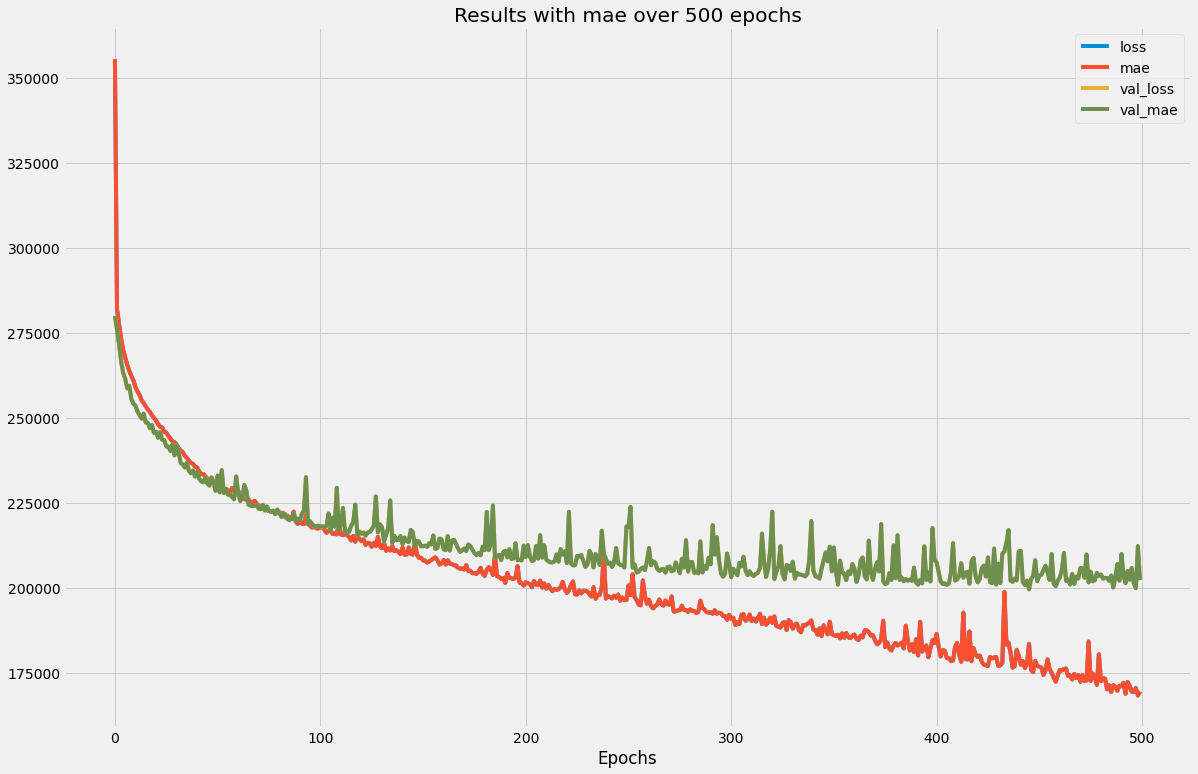

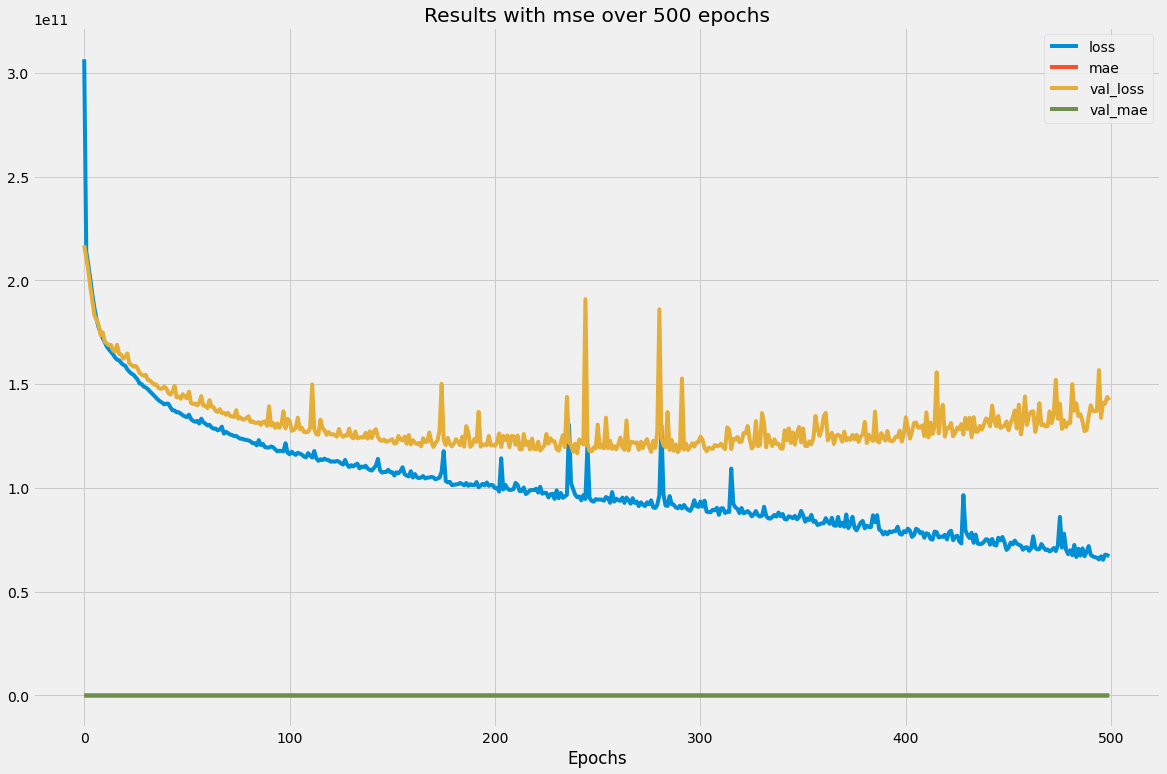

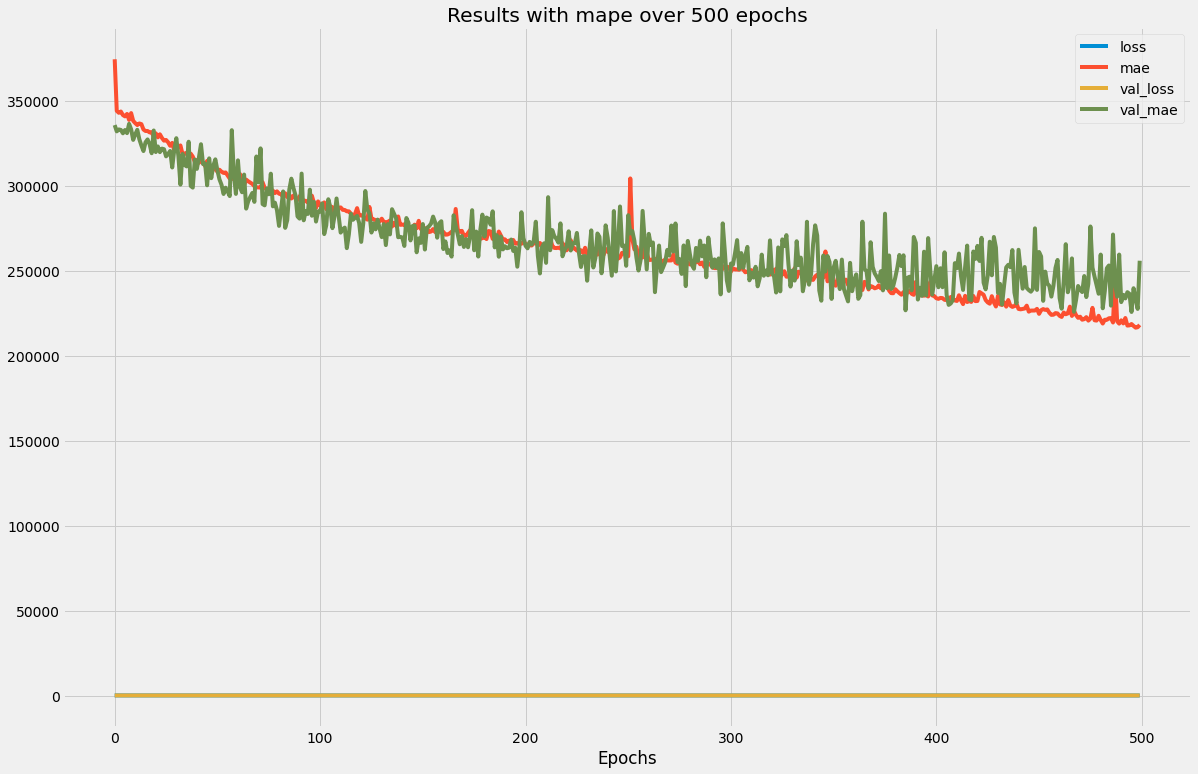

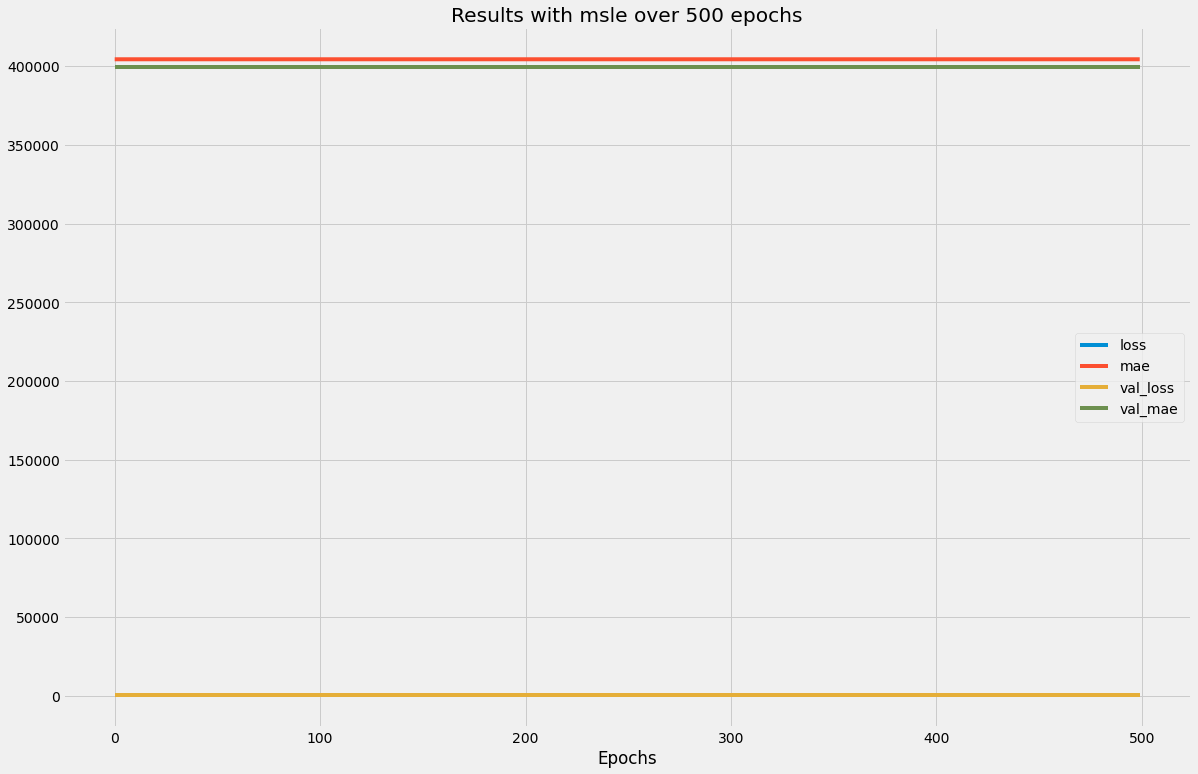

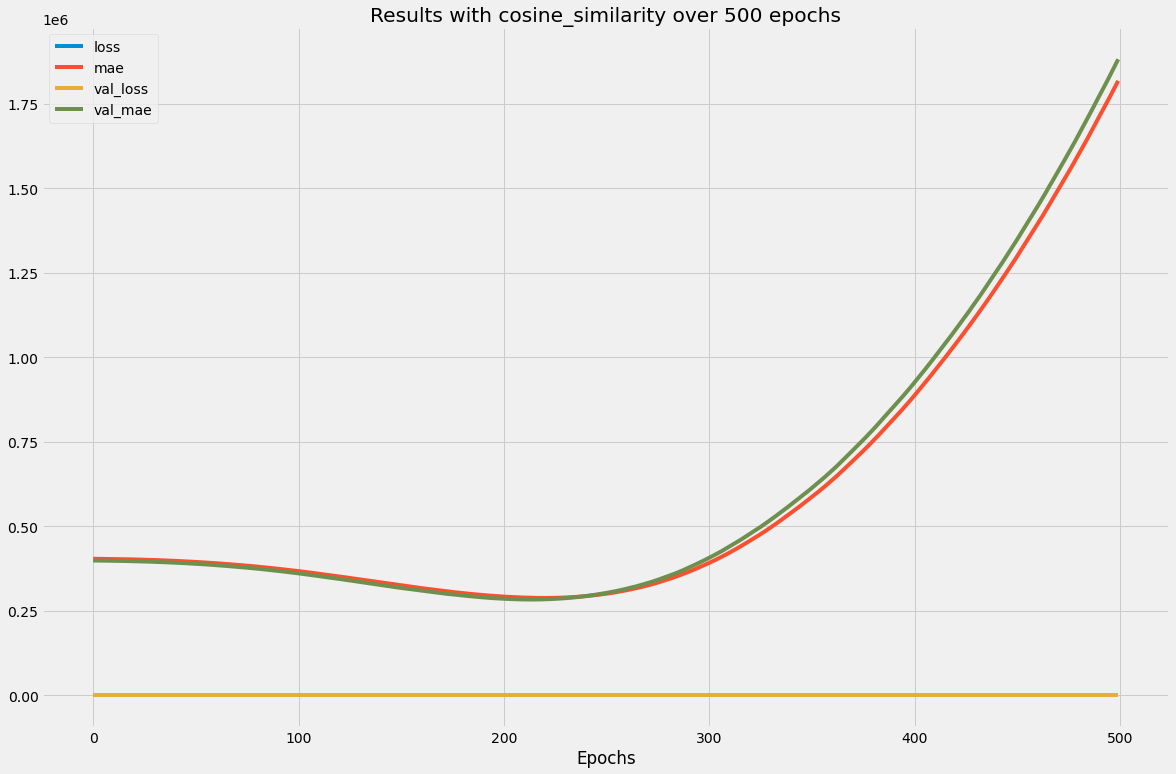

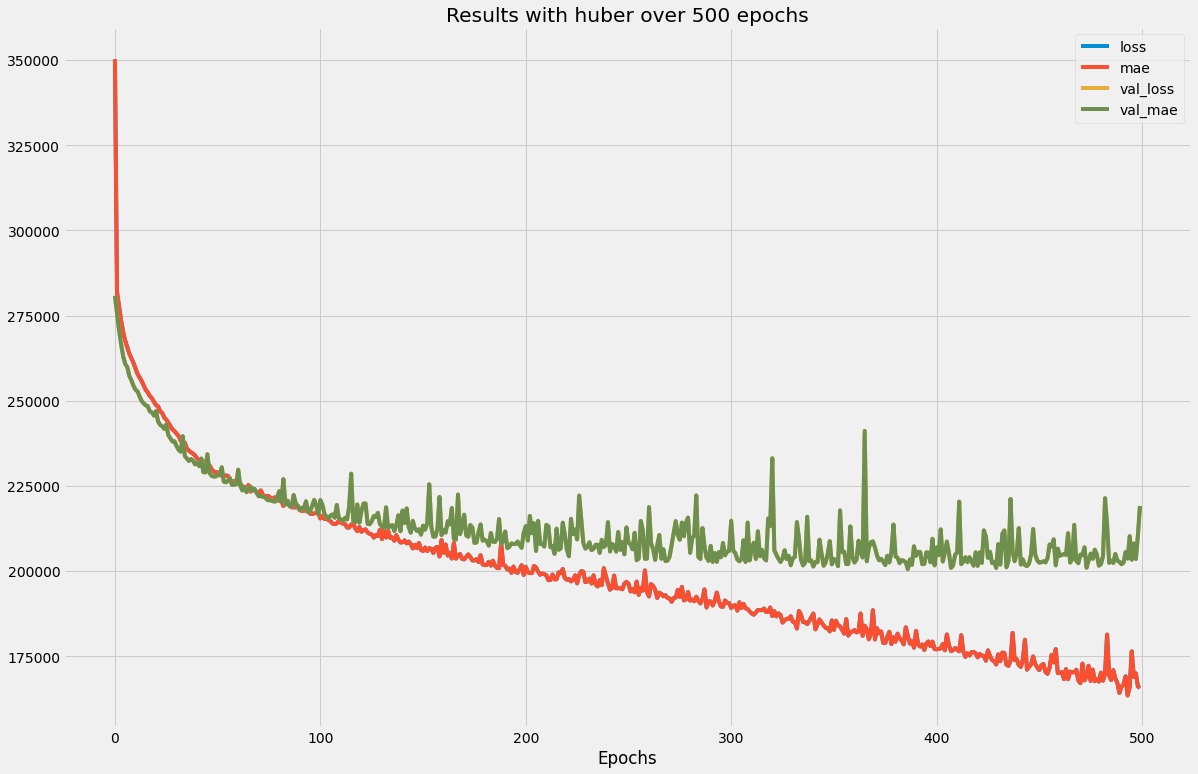

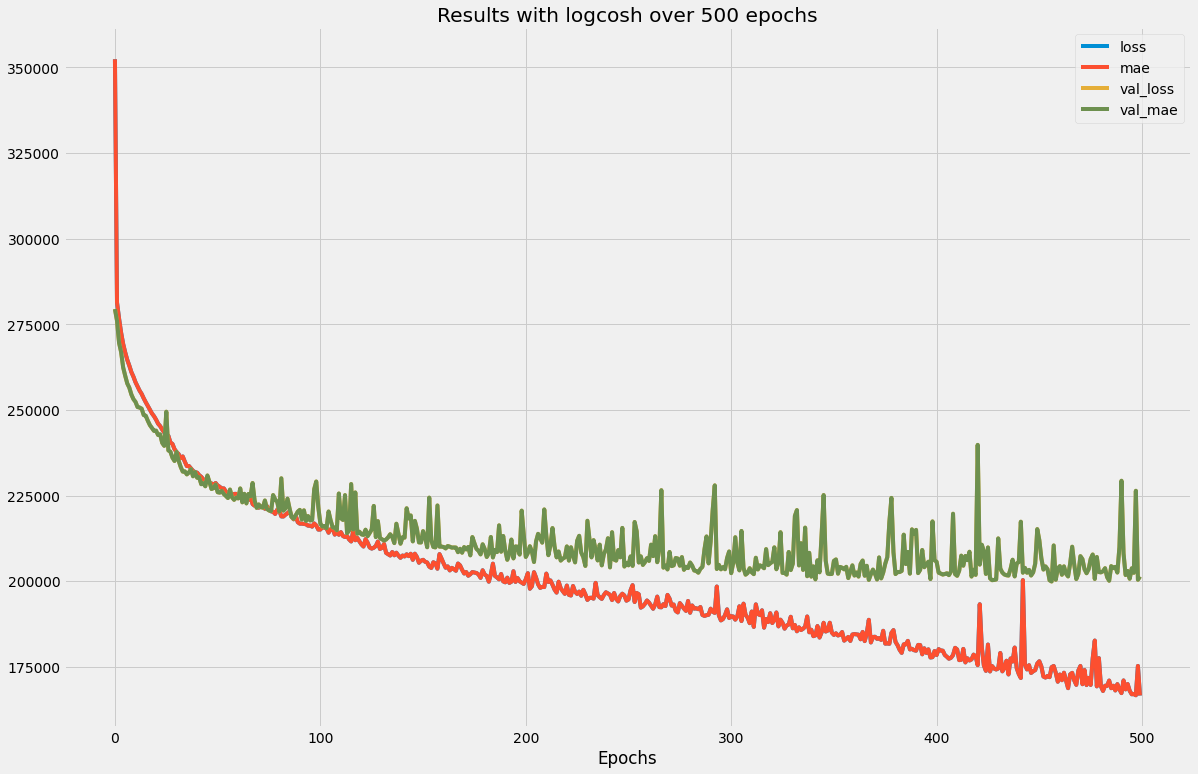

In [146]:
for history, loss in zip(history_lst, loss_functions):
    fig, ax = plt.subplots(figsize=(18,12))

    [ax.plot(history.history[i], label=i) for i in history.history.keys()]
    ax.set_title(f'Results with {loss} over {epochs} epochs')
    ax.set_xlabel('Epochs')
    plt.legend()
    plt.savefig(f'images/{loss}_network_graph.png');

In [183]:
for history, loss in zip(history_lst, loss_functions):
    print(f"{loss} had a final val_loss of {history.history['val_loss'][-1]}")
    print('')

mae had a final val_loss of 202289.53125

mse had a final val_loss of 142236286976.0

mape had a final val_loss of 68.57567596435547

msle had a final val_loss of 154.00787353515625

cosine_similarity had a final val_loss of -1.0

huber had a final val_loss of 219148.109375

logcosh had a final val_loss of 201331.84375

